<h1>Analysis On Student's  Performance</h1>
<p> Group 13 </p>

# Objective of this Analysis:
<p>To understand the how the student's performance (Test preparation course) is affected by the other variables (Gender, Ethnicity, Parental level of education, Lunch).</p>

# What to do in  Exploratory Data Analysis:
1. To Analyse insights in the dataset.
2. To understand the connection between the variables and to uncover the underlying structure
3. To extract the important Variables.
4. To test the underlying assumptions.
5. Provide Insights with Suitable Graphs and Visualizations.
6. Write all your inferences with supporting Analysis and Visualizations.

<h1>Parameters: </h1>
<ol>
<li>gender: Gender of the student</li>
    <li>race/ethnicity: Race of the Student As Group A/B/C</li>
    <li>parental level of education  : What is the education Qualification of Students Parent</li>
    <li>lunch: Whether the lunch is Standard type/Free lunch or Some discounted lunch</li>
    <li>test preparation course: Whether Student has Taken or not and Completed</li>
    <li>math score: Scores in Maths</li>
    <li>reading score: Scores in Reading</li>
    <li>writing score: Scores in Writing </li>
</ol>

In [2]:
# importing libraries

from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash import html
from dash.dependencies import Output,Input,State
import plotly.graph_objects as go
import seaborn as sns

C:\Users\dawat\AppData\Local\Temp/ipykernel_17076/350947600.py:14: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\dawat\AppData\Local\Temp/ipykernel_17076/350947600.py:15: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [3]:
df=pd.read_csv("StudentsPerformance.csv",)

df.rename(
    columns = ({'gender':'Gender', 'race/ethnicity':'Race', 'parental level of education':'Parental_Education', 'lunch':'Lunch', 'test preparation course':'Test_Preparation_Course', 'math score':'Math_Mark', 'reading score':'Reading_Mark', 'writing score':'Writing_Mark'}),
    inplace = True,
)
df.head(10)

Gender     Race  Parental_Education         Lunch Test_Preparation_Course  \
0  female  group B   bachelor's degree      standard                    none   
1  female  group C        some college      standard               completed   
2  female  group B     master's degree      standard                    none   
3    male  group A  associate's degree  free/reduced                    none   
4    male  group C        some college      standard                    none   
5  female  group B  associate's degree      standard                    none   
6  female  group B        some college      standard               completed   
7    male  group B        some college  free/reduced                    none   
8    male  group D         high school  free/reduced               completed   
9  female  group B         high school  free/reduced                    none   

   Math_Mark  Reading_Mark  Writing_Mark  
0         72            72            74  
1         69            90            88  
2         90            95            93  
3         47            57            44  
4         76            78            75  
5         71            83            78  
6         88            95            92  
7         40            43            39  
8         64            64            67  
9         38            60            50

<h3>Columns and unique values </h3>

In [4]:
df.columns

Index(['Gender', 'Race', 'Parental_Education', 'Lunch',
       'Test_Preparation_Course', 'Math_Mark', 'Reading_Mark', 'Writing_Mark'],
      dtype='object')

In [5]:
df['Race'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [6]:
df['Parental_Education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [7]:
df['Lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [8]:
df['Test_Preparation_Course'].unique()

array(['none', 'completed'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   1000 non-null   object
 1   Race                     1000 non-null   object
 2   Parental_Education       1000 non-null   object
 3   Lunch                    1000 non-null   object
 4   Test_Preparation_Course  1000 non-null   object
 5   Math_Mark                1000 non-null   int64 
 6   Reading_Mark             1000 non-null   int64 
 7   Writing_Mark             1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.dtypes     #Check Data Types for all the columns

Gender                     object
Race                       object
Parental_Education         object
Lunch                      object
Test_Preparation_Course    object
Math_Mark                   int64
Reading_Mark                int64
Writing_Mark                int64
dtype: object

In [11]:
df.isnull().sum()

Gender                     0
Race                       0
Parental_Education         0
Lunch                      0
Test_Preparation_Course    0
Math_Mark                  0
Reading_Mark               0
Writing_Mark               0
dtype: int64

<h5>Inference: There are no null values so no need to drop any rows</h5>

In [12]:
df.shape

(1000, 8)

In [13]:
import numpy as np                    #There are some columns which contains value as "?". Replace them with np.nan.
df = df.replace('?', np.nan)
df.tail()

Gender     Race Parental_Education         Lunch Test_Preparation_Course  \
995  female  group E    master's degree      standard               completed   
996    male  group C        high school  free/reduced                    none   
997  female  group C        high school  free/reduced               completed   
998  female  group D       some college      standard               completed   
999  female  group D       some college  free/reduced                    none   

     Math_Mark  Reading_Mark  Writing_Mark  
995         88            99            95  
996         62            55            55  
997         59            71            65  
998         68            78            77  
999         77            86            86

In [14]:
df.describe()

Math_Mark  Reading_Mark  Writing_Mark
count  1000.00000   1000.000000   1000.000000
mean     66.08900     69.169000     68.054000
std      15.16308     14.600192     15.195657
min       0.00000     17.000000     10.000000
25%      57.00000     59.000000     57.750000
50%      66.00000     70.000000     69.000000
75%      77.00000     79.000000     79.000000
max     100.00000    100.000000    100.000000

<h3>Total number of values for each unique column in the dataset</h3>

In [15]:
df['Gender'].value_counts()

female    518
male      482
Name: Gender, dtype: int64

In [16]:
df['Race'].value_counts() #arranged in descending order of occurences

group C    319
group D    262
group B    190
group E    140
group A     89
Name: Race, dtype: int64

In [17]:
df['Parental_Education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Parental_Education, dtype: int64

In [18]:
df['Test_Preparation_Course'].value_counts()

none         642
completed    358
Name: Test_Preparation_Course, dtype: int64

In [19]:
df['Lunch'].value_counts()

standard        645
free/reduced    355
Name: Lunch, dtype: int64

# Feature Engineering

<AxesSubplot:xlabel='Math_Mark'>

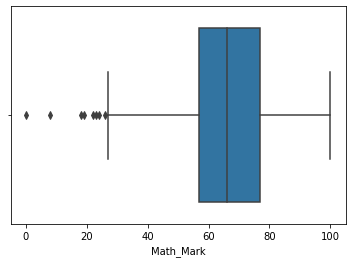

In [183]:
sns.boxplot(x=df['Math_Mark'])


In [184]:
Q1 = df.Math_Mark.quantile(0.25)
Q3 = df.Math_Mark.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [38]:
df[(df.Math_Mark < lowerlimit)  | (df.Math_Mark > upperlimit)] 

Gender     Race  Parental_Education         Lunch  \
17   female  group B    some high school  free/reduced   
59   female  group C    some high school  free/reduced   
145  female  group C        some college  free/reduced   
338  female  group B    some high school  free/reduced   
466  female  group D  associate's degree  free/reduced   
787  female  group B        some college      standard   
842  female  group B         high school  free/reduced   
980  female  group B         high school  free/reduced   

    Test_Preparation_Course  Math_Mark  Reading_Mark  Writing_Mark  
17                     none         18            32            28  
59                     none          0            17            10  
145                    none         22            39            33  
338                    none         24            38            27  
466                    none         26            31            38  
787                    none         19            38            32  
842               completed         23            44            36  
980                    none          8            24            23

In [39]:
df1 = df[(df.Math_Mark > lowerlimit) & (df.Math_Mark < upperlimit)]
df1.head()

Gender     Race  Parental_Education         Lunch Test_Preparation_Course  \
0  female  group B   bachelor's degree      standard                    none   
1  female  group C        some college      standard               completed   
2  female  group B     master's degree      standard                    none   
3    male  group A  associate's degree  free/reduced                    none   
4    male  group C        some college      standard                    none   

   Math_Mark  Reading_Mark  Writing_Mark  
0         72            72            74  
1         69            90            88  
2         90            95            93  
3         47            57            44  
4         76            78            75

<AxesSubplot:xlabel='Math_Mark'>

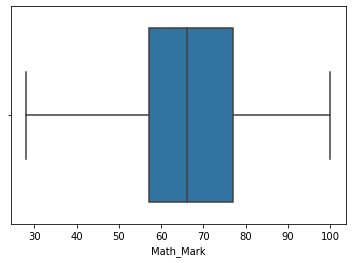

In [40]:
sns.boxplot(x=df1['Math_Mark'])


<AxesSubplot:xlabel='Writing_Mark'>

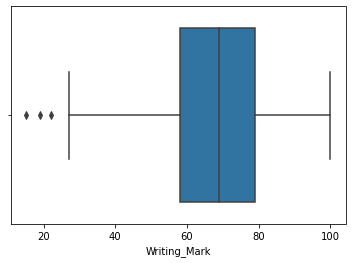

In [41]:
sns.boxplot(x=df1['Writing_Mark'])


In [42]:
Q1 = df1.Writing_Mark.quantile(0.25)
Q3 = df.Writing_Mark.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [43]:
df1[(df1.Writing_Mark < lowerlimit)  | (df1.Writing_Mark > upperlimit)] 

Gender     Race Parental_Education         Lunch Test_Preparation_Course  \
76    male  group E   some high school      standard                    none   
327   male  group A       some college  free/reduced                    none   
596   male  group B        high school  free/reduced                    none   

     Math_Mark  Reading_Mark  Writing_Mark  
76          30            26            22  
327         28            23            19  
596         30            24            15

In [46]:
df1 = df1[(df1.Writing_Mark > lowerlimit) & (df1.Writing_Mark < upperlimit)]
df1.head()

Gender     Race  Parental_Education         Lunch Test_Preparation_Course  \
0  female  group B   bachelor's degree      standard                    none   
1  female  group C        some college      standard               completed   
2  female  group B     master's degree      standard                    none   
3    male  group A  associate's degree  free/reduced                    none   
4    male  group C        some college      standard                    none   

   Math_Mark  Reading_Mark  Writing_Mark  
0         72            72            74  
1         69            90            88  
2         90            95            93  
3         47            57            44  
4         76            78            75

<AxesSubplot:xlabel='Writing_Mark'>

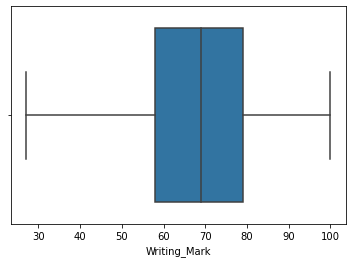

In [47]:
sns.boxplot(x=df1['Writing_Mark'])


<AxesSubplot:xlabel='Reading_Mark'>

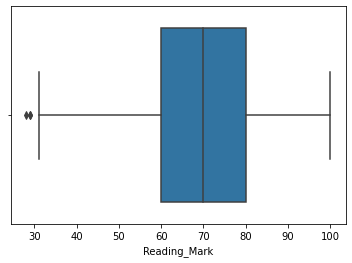

In [48]:
sns.boxplot(x=df1['Reading_Mark'])


In [49]:
Q1 = df1.Reading_Mark.quantile(0.25)
Q3 = df.Reading_Mark.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [50]:
df1[(df1.Writing_Mark < lowerlimit)  | (df1.Writing_Mark > upperlimit)] 

Gender     Race Parental_Education         Lunch Test_Preparation_Course  \
211    male  group C       some college  free/reduced                    none   
601  female  group C        high school      standard                    none   
896    male  group B        high school  free/reduced                    none   

     Math_Mark  Reading_Mark  Writing_Mark  
211         35            28            27  
601         29            29            30  
896         36            29            27

In [51]:
df1 = df1[(df1.Writing_Mark > lowerlimit) & (df1.Writing_Mark < upperlimit)]
df1.head()

Gender     Race  Parental_Education         Lunch Test_Preparation_Course  \
0  female  group B   bachelor's degree      standard                    none   
1  female  group C        some college      standard               completed   
2  female  group B     master's degree      standard                    none   
3    male  group A  associate's degree  free/reduced                    none   
4    male  group C        some college      standard                    none   

   Math_Mark  Reading_Mark  Writing_Mark  
0         72            72            74  
1         69            90            88  
2         90            95            93  
3         47            57            44  
4         76            78            75

<AxesSubplot:xlabel='Writing_Mark'>

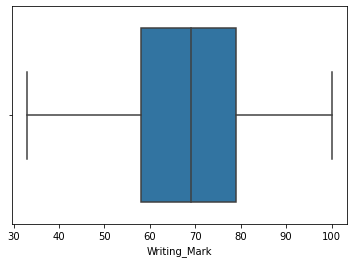

In [53]:
sns.boxplot(x=df1['Writing_Mark'])


# Feature transformation

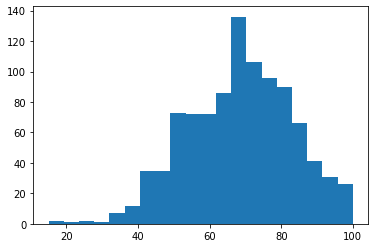

In [350]:
plt.hist(df1.Writing_Mark, bins = 20)#Feature transformation
plt.show()


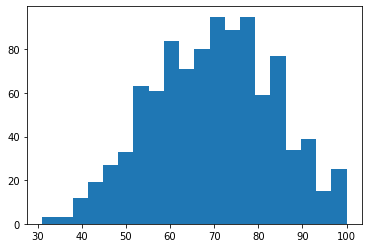

In [55]:
plt.hist(df1.Reading_Mark, bins = 20)
plt.show()

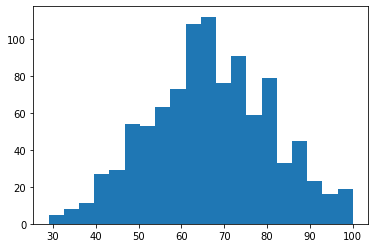

In [57]:
plt.hist(df1.Math_Mark, bins = 20)
plt.show()

In [58]:
categorical_features = df1.select_dtypes(include=['object'])
categorical_features.head()

Gender     Race  Parental_Education         Lunch Test_Preparation_Course
0  female  group B   bachelor's degree      standard                    none
1  female  group C        some college      standard               completed
2  female  group B     master's degree      standard                    none
3    male  group A  associate's degree  free/reduced                    none
4    male  group C        some college      standard                    none

In [59]:
numerical_features = df1.select_dtypes(include=['int64','float64'])
numerical_features.head()

Math_Mark  Reading_Mark  Writing_Mark
0         72            72            74
1         69            90            88
2         90            95            93
3         47            57            44
4         76            78            75

In [60]:
categorical_features.isna().sum()

Gender                     0
Race                       0
Parental_Education         0
Lunch                      0
Test_Preparation_Course    0
dtype: int64

In [61]:
#SimpleImputer to impute categorical values with most frequent values.
from sklearn.impute import SimpleImputer
imputeC = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
categorical_data = imputeC.fit_transform(categorical_features)
categorical_data = pd.DataFrame(data = categorical_data, columns = categorical_features.columns)
categorical_data.head()

Gender     Race  Parental_Education         Lunch Test_Preparation_Course
0  female  group B   bachelor's degree      standard                    none
1  female  group C        some college      standard               completed
2  female  group B     master's degree      standard                    none
3    male  group A  associate's degree  free/reduced                    none
4    male  group C        some college      standard                    none

In [64]:
imputeN = SimpleImputer(missing_values = np.nan, strategy = 'mean')
numerical_data = imputeN.fit_transform(numerical_features)
numerical_data = pd.DataFrame(data = numerical_data, columns = numerical_features.columns)
numerical_data.head()


Math_Mark  Reading_Mark  Writing_Mark
0       72.0          72.0          74.0
1       69.0          90.0          88.0
2       90.0          95.0          93.0
3       47.0          57.0          44.0
4       76.0          78.0          75.0

In [65]:
numerical_data.isna().sum()

Math_Mark       0
Reading_Mark    0
Writing_Mark    0
dtype: int64

In [66]:
#The Standard Scaler assumes data is normally distributed within each feature and scales them 
#such that the distribution centered around 0, with a standard deviation of 1.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
numerical_scaled = sc.fit_transform(numerical_data)
numerical_data = pd.DataFrame(data=numerical_scaled, columns = numerical_data.columns)
numerical_data.head()

Math_Mark  Reading_Mark  Writing_Mark
0   0.367004      0.159451      0.368070
1   0.156268      1.461525      1.343734
2   1.631422      1.823213      1.692186
3  -1.389132     -0.925611     -1.722640
4   0.647986      0.593476      0.437760

In [67]:
y = categorical_data.Test_Preparation_Course  #Test_Preparation_Course in 'y' variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y


array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,

In [68]:
categorical_data = categorical_data.drop(["Test_Preparation_Course"], axis = 1)

In [69]:
#Encode all categorical features using ordinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
encoded_data = OE.fit_transform(categorical_data)
categorical_data = pd.DataFrame(data = encoded_data, columns = categorical_data.columns)
categorical_data

Gender  Race  Parental_Education  Lunch
0       0.0   1.0                 1.0    1.0
1       0.0   2.0                 4.0    1.0
2       0.0   1.0                 3.0    1.0
3       1.0   0.0                 0.0    0.0
4       1.0   2.0                 4.0    1.0
..      ...   ...                 ...    ...
979     0.0   4.0                 3.0    1.0
980     1.0   2.0                 2.0    0.0
981     0.0   2.0                 2.0    0.0
982     0.0   3.0                 4.0    1.0
983     0.0   3.0                 4.0    0.0

[984 rows x 4 columns]

In [70]:
#Concatenate Categorical and Numerical Features together in single dataframe X
X = pd.concat([categorical_data, numerical_data], axis = 1)
X.head()

Gender  Race  Parental_Education  Lunch  Math_Mark  Reading_Mark  \
0     0.0   1.0                 1.0    1.0   0.367004      0.159451   
1     0.0   2.0                 4.0    1.0   0.156268      1.461525   
2     0.0   1.0                 3.0    1.0   1.631422      1.823213   
3     1.0   0.0                 0.0    0.0  -1.389132     -0.925611   
4     1.0   2.0                 4.0    1.0   0.647986      0.593476   

   Writing_Mark  
0      0.368070  
1      1.343734  
2      1.692186  
3     -1.722640  
4      0.437760

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5, shuffle = True, stratify = y)

In [72]:
#checking shape of all splitted data
print("x_train", x_train.shape, "x_test", x_test.shape, "y_train", y_train.shape, "y_test", y_test.shape)

x_train (787, 7) x_test (197, 7) y_train (787,) y_test (197,)


<h3>Train the model<h3>

In [73]:
#For training the model, three algorithms are been used.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [185]:
lmodel = LogisticRegression()                       
dtmodel = DecisionTreeClassifier()
knnmodel = KNeighborsClassifier(n_neighbors = 5)

In [186]:
lmodel.fit(x_train, y_train)
dtmodel.fit(x_train, y_train)
knnmodel.fit(x_train, y_train)

KNeighborsClassifier()

<h3>Evaluating the model<h3>

In [187]:
#Evaluate the accuracy of the model by using score method
print("Model 1 Train Score: ",lmodel.score(x_train,y_train))
print("Model 1 Test Score: ",lmodel.score(x_test,y_test))

Model 1 Train Score:  0.7229987293519695
Model 1 Test Score:  0.751269035532995


In [188]:
print("Model 2 Train Score: ",dtmodel.score(x_train,y_train))
print("Model 2 Test Score: ",dtmodel.score(x_test,y_test))

Model 2 Train Score:  1.0
Model 2 Test Score:  0.6243654822335025


In [189]:
print("Model 3 Train Score: ",knnmodel.score(x_train,y_train))
print("Model 3 Test Score: ",knnmodel.score(x_test,y_test))

Model 3 Train Score:  0.758576874205845
Model 3 Test Score:  0.583756345177665


In [104]:
lmodel.predict(x_test)


array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [105]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [108]:
#predicted value for test data
y_hat = lmodel.predict(x_test)

In [116]:
#finding model accuracy using f1_score from sklearn.metrics
from sklearn.metrics import f1_score
f1_score(y_test,y_hat)

0.8256227758007118

In [191]:
sample = np.array([0.0,1.0,1.0,1.0,0.390024,0.193999,0.391492]).reshape(-1,7)
pred = lmodel.predict(sample)
pred

C:\Users\dawat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

<h3> Finding the total number of values in each attributes by pie chart as per percentage<h3>

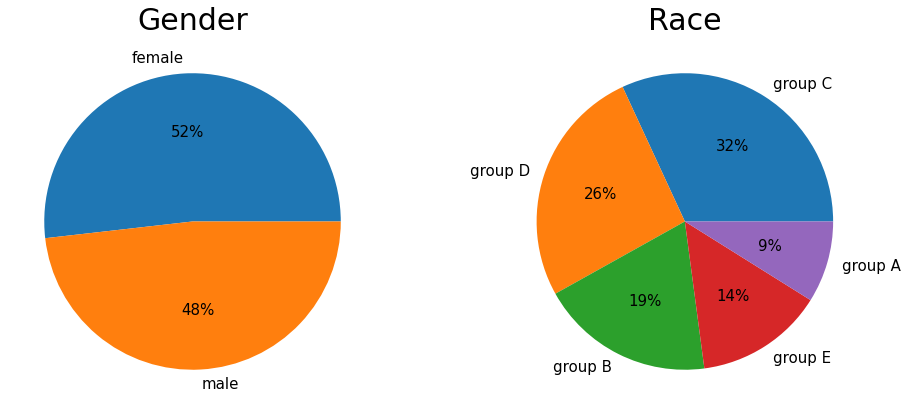

In [117]:
plt.figure(figsize=(25,15))

plt.subplot(231)
plt.title("Gender",fontsize=30)
df['Gender'].value_counts().plot.pie(autopct="%.f%%",fontsize=15)
plt.ylabel("")

plt.subplot(232)
plt.title("Race",fontsize=30)
df['Race'].value_counts().plot.pie(autopct="%.0f%%",fontsize=15)
plt.ylabel("")

plt.show()

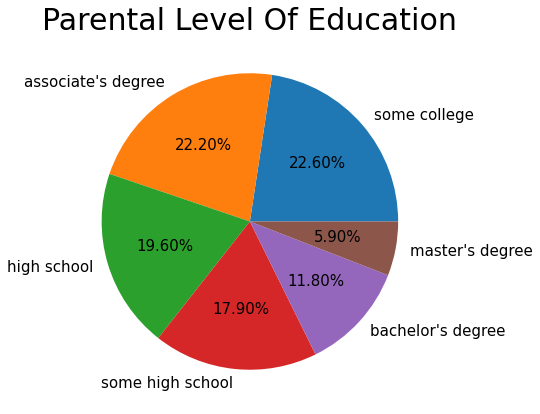

In [118]:
plt.figure(figsize=(25,15))

plt.subplot(233)
plt.title("Parental Level Of Education",fontsize=30)
df['Parental_Education'].value_counts().plot.pie(autopct="%.2f%%", fontsize=15)
plt.ylabel("")

plt.show()

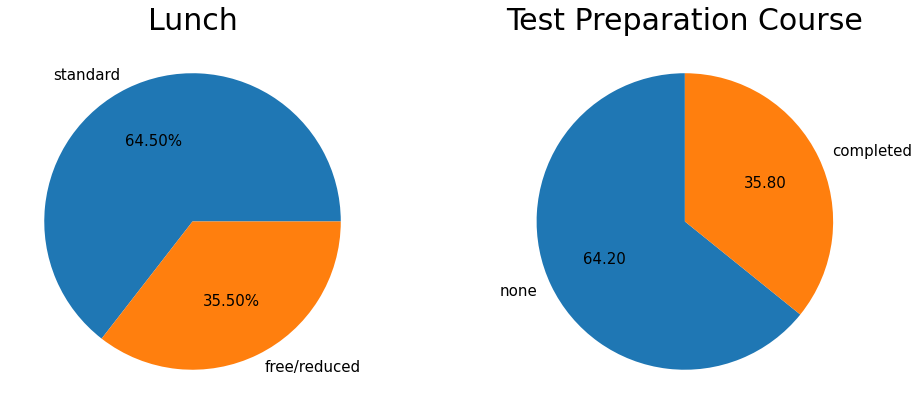

In [119]:
plt.figure(figsize=(25,15))

plt.subplot(234)
plt.title("Lunch",fontsize=30)
df['Lunch'].value_counts().plot.pie(autopct="%.2f%%",fontsize=15)
plt.ylabel("")

plt.subplot(235)
plt.title("Test Preparation Course",fontsize=30)
df['Test_Preparation_Course'].value_counts().plot.pie(startangle=90,autopct="%.2f",fontsize=15)
plt.ylabel("")

plt.show()

<h3>Observations:</h3>
<ol>
    <li>The number of females are slightly more than  number of males</li>
    <li>Most students belong to Group C and least number belong to Group A</li>
    <li>Parents of most students have either an associate degree or degree in some college, while least number of students's parents have <i>Master's degree</i></li>
    <li>Nearly double the number of students opted for standard lunch</li>
    <li>Nearly double the number of students neither did nor completed the test preparation course</li>
</ol>

<h2>Finding number of students who got a particular score in each subject by using Bar Graph.</h2>

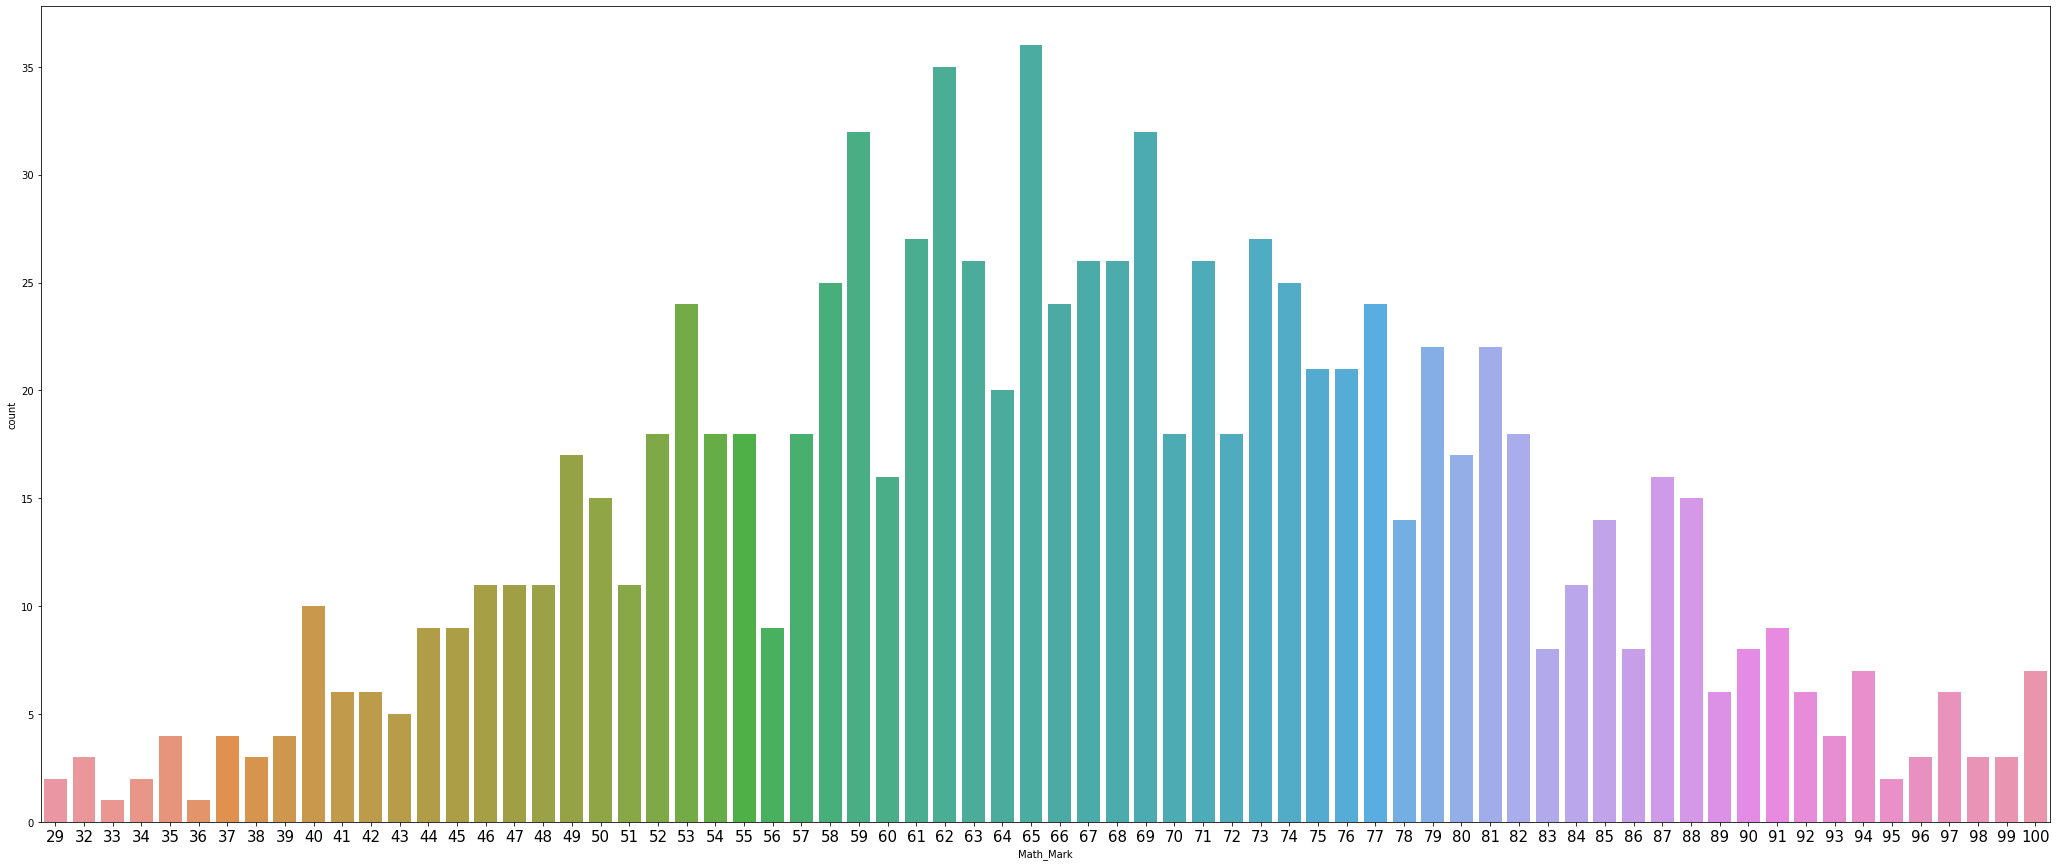

In [150]:
plt.figure(figsize=(36,15))
sns.countplot(x='Math_Mark',data=df1)
plt.xticks(fontsize=15)
plt.show()

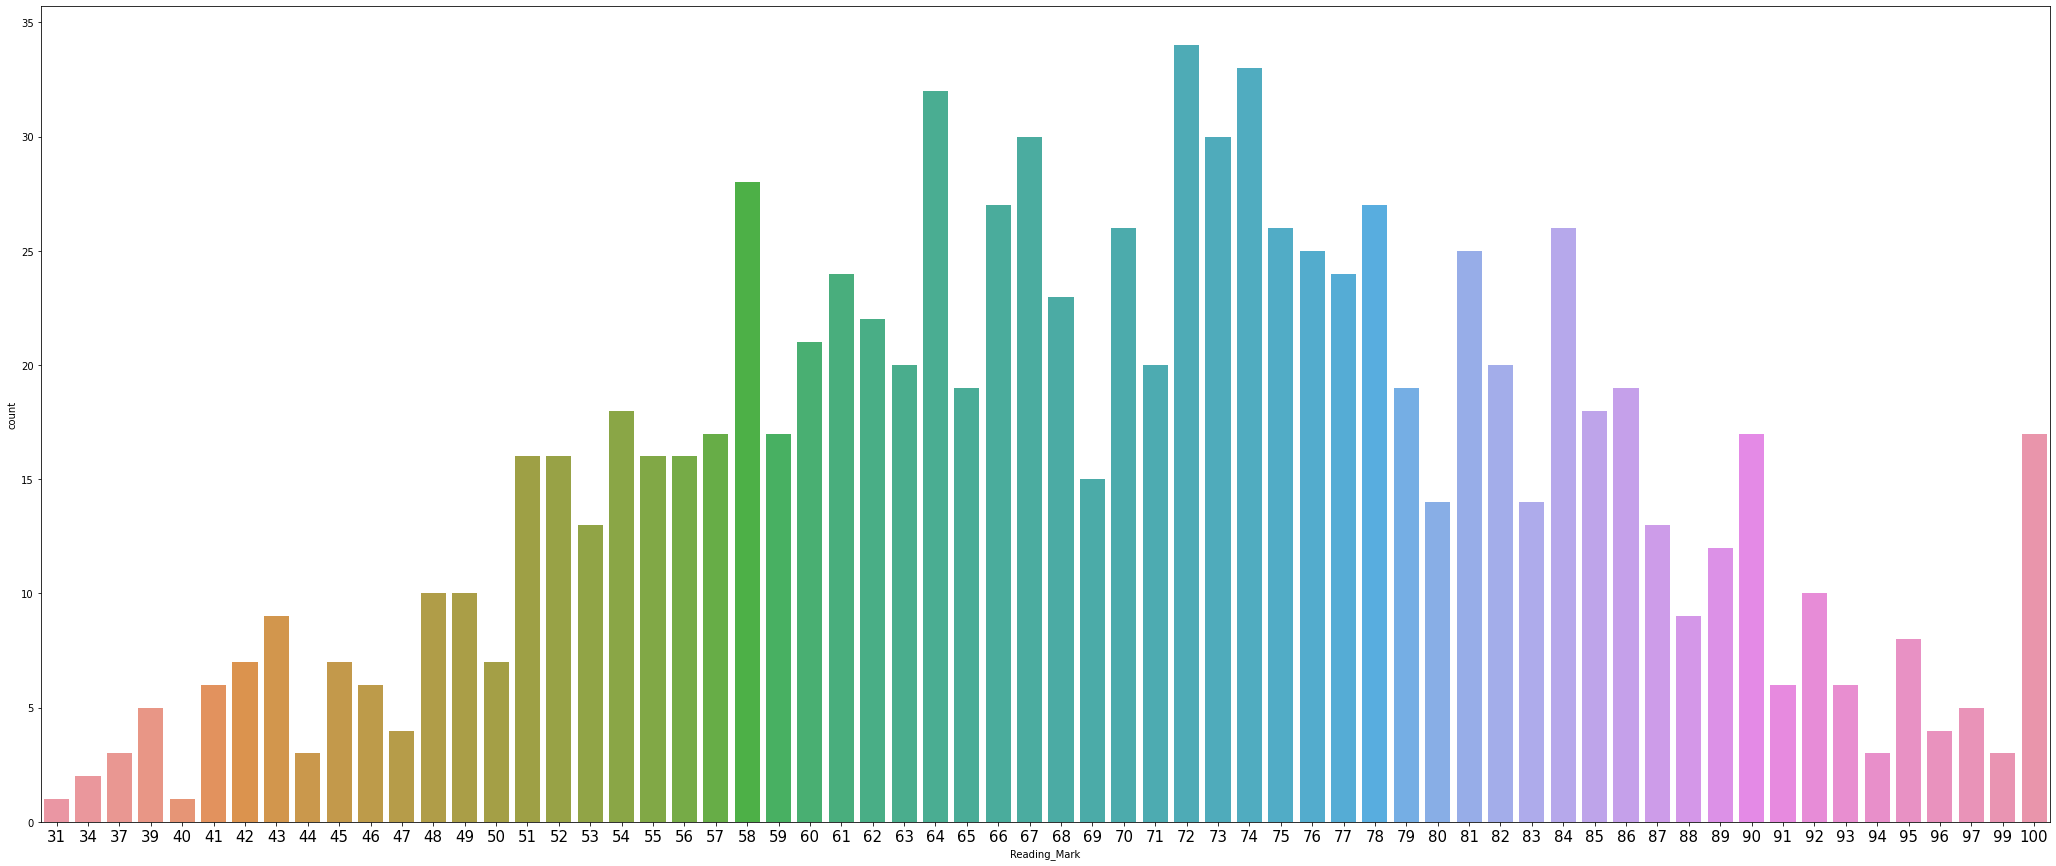

In [151]:
plt.figure(figsize=(36,15))
sns.countplot(x='Reading_Mark',data=df1)
plt.xticks(fontsize=15)
plt.show()

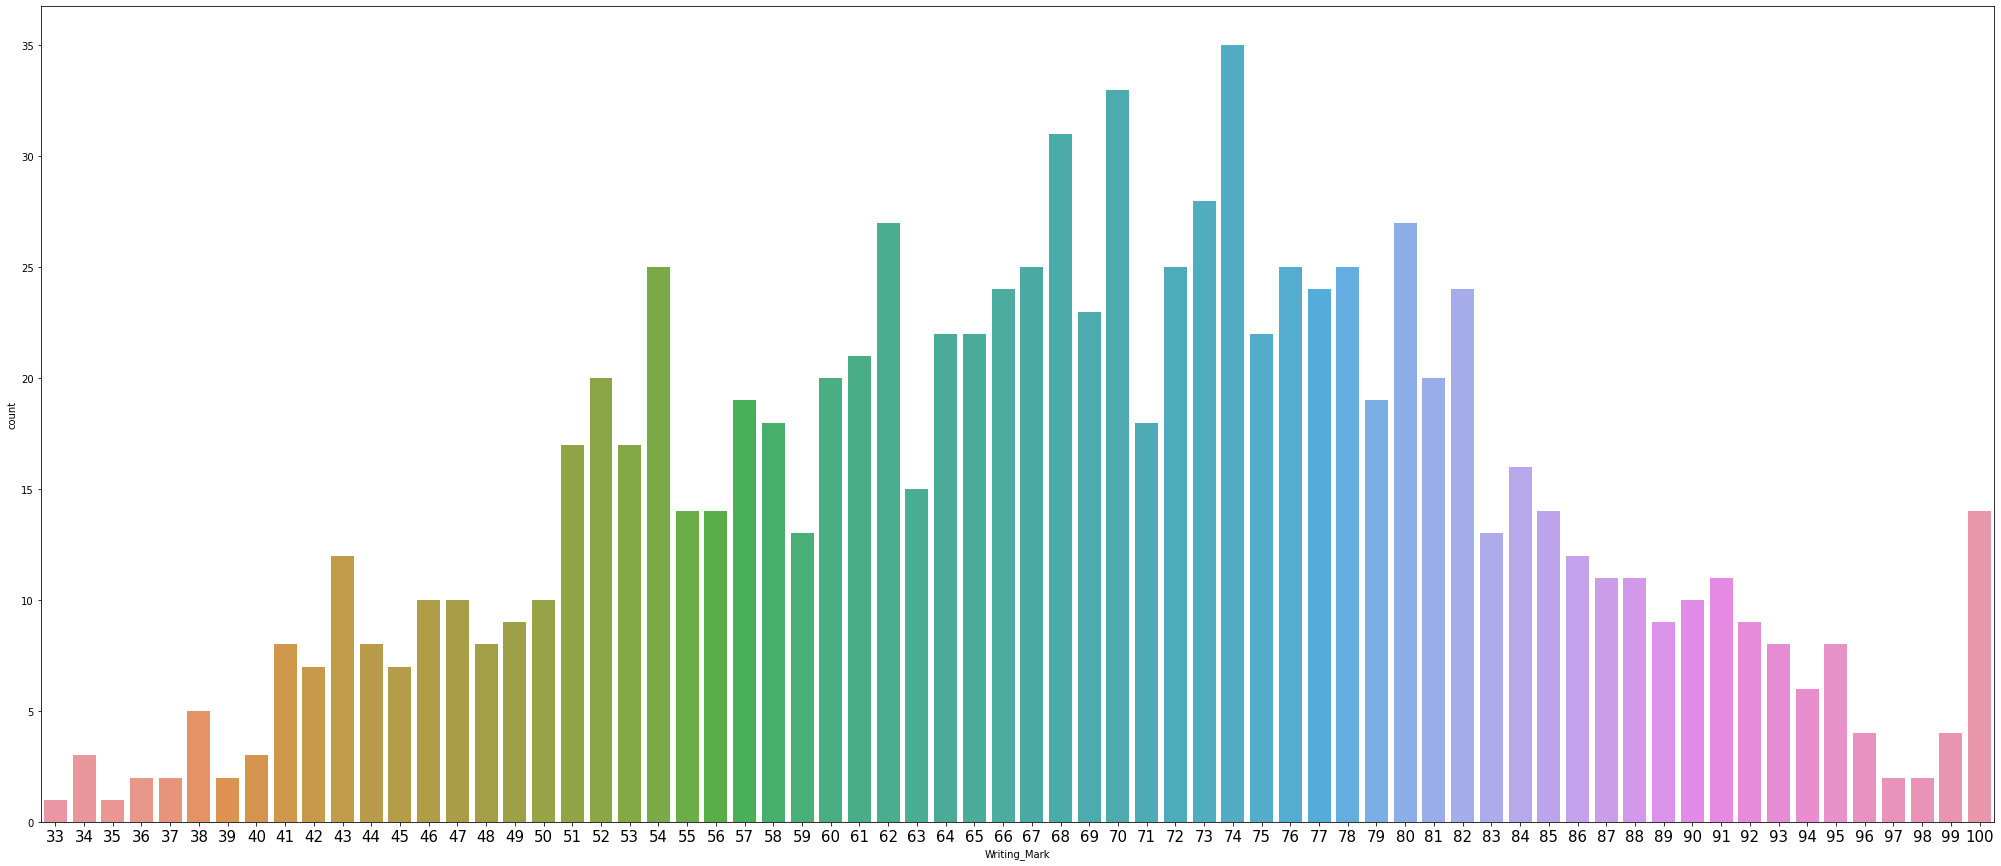

In [152]:
# palette colours: deep, muted, bright, pastel, dark, colorblind,Blues, husl(default), RdBu
# _d reverses order of colour

plt.figure(figsize=(35,15))
sns.countplot(x='Writing_Mark',data=df1)
plt.xticks(fontsize=15)
plt.show()

<h2>Finding number of students who got a particular score in each subject by using Box Plot</h2>

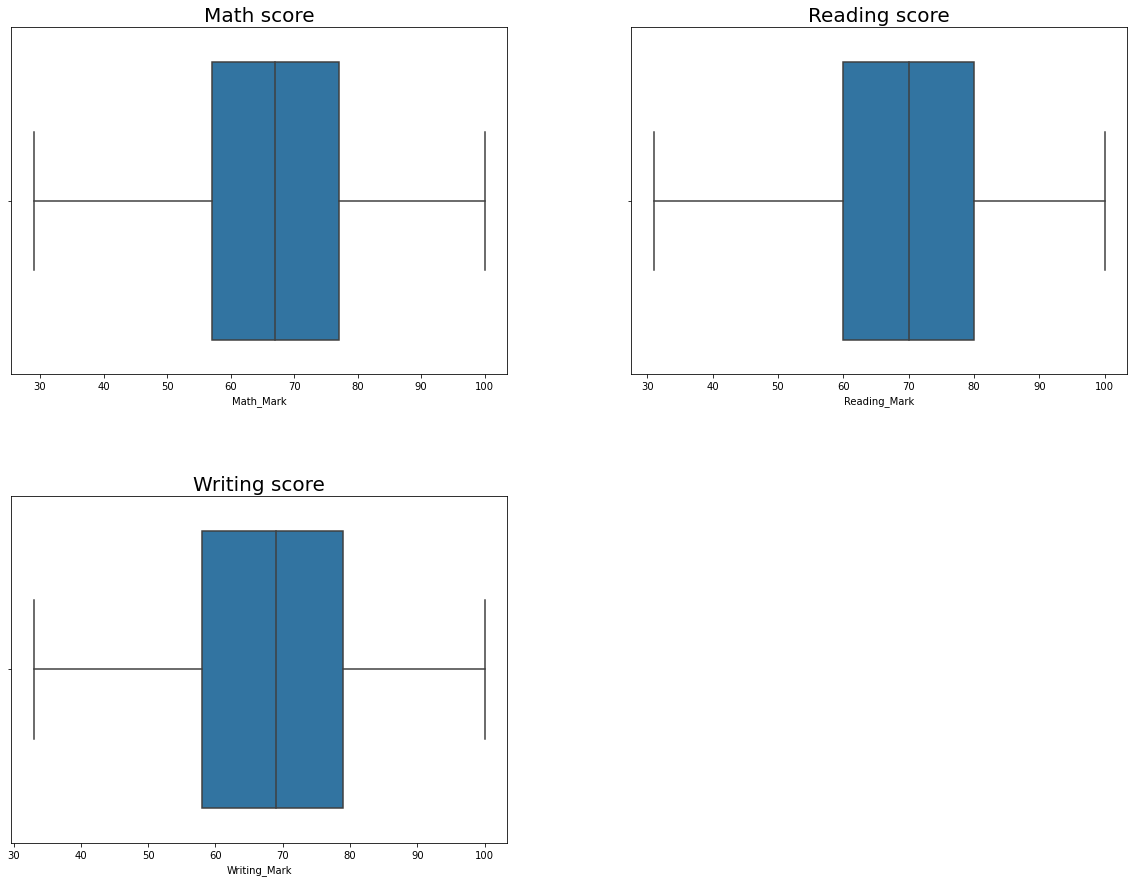

In [153]:
plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=0.35,wspace=0.25)

plt.subplot(221)
plt.title("Math score",fontsize=20)
sns.boxplot(x=df1['Math_Mark'])

plt.subplot(222)
plt.title("Reading score",fontsize=20)
sns.boxplot(x=df1['Reading_Mark'])

plt.subplot(223)
plt.title("Writing score",fontsize=20)
sns.boxplot(x=df1['Writing_Mark'])

plt.show()

In [154]:
# Meaure of central tendency of all three subjects
df.describe()

Math_Mark  Reading_Mark  Writing_Mark
count  1000.00000   1000.000000   1000.000000
mean     66.08900     69.169000     68.054000
std      15.16308     14.600192     15.195657
min       0.00000     17.000000     10.000000
25%      57.00000     59.000000     57.750000
50%      66.00000     70.000000     69.000000
75%      77.00000     79.000000     79.000000
max     100.00000    100.000000    100.000000

<h2>Comparison of result performances as per Gender</h2>

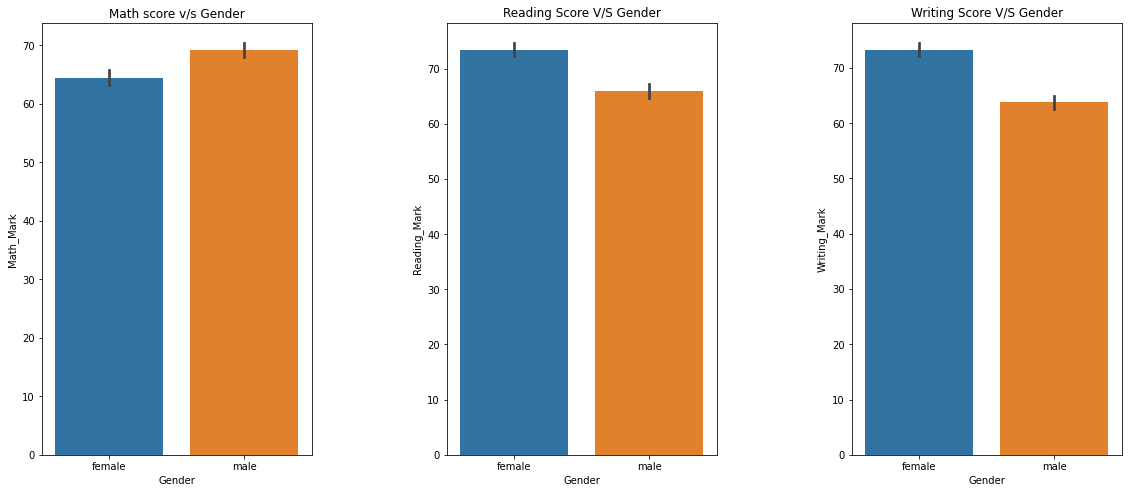

In [157]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0.25, wspace=0.5)

plt.subplot(131)
plt.title("Math score v/s Gender")
sns.barplot(x="Gender",y='Math_Mark',data=df1)

plt.subplot(132)
plt.title("Reading Score V/S Gender")
sns.barplot(x='Gender',y='Reading_Mark',data=df1)

plt.subplot(133)
plt.title("Writing Score V/S Gender")
sns.barplot(x='Gender',y='Writing_Mark',data=df1)

plt.show()

<h3>Observations:</h3>
<ol>
    <li>Males performed better than females in Math</li>
    <li>Females performed better than males in both Reading and Writing</li>
    <li>Overall femalees performed better than males, since females performed better than males in two subjects</li>
</ol>

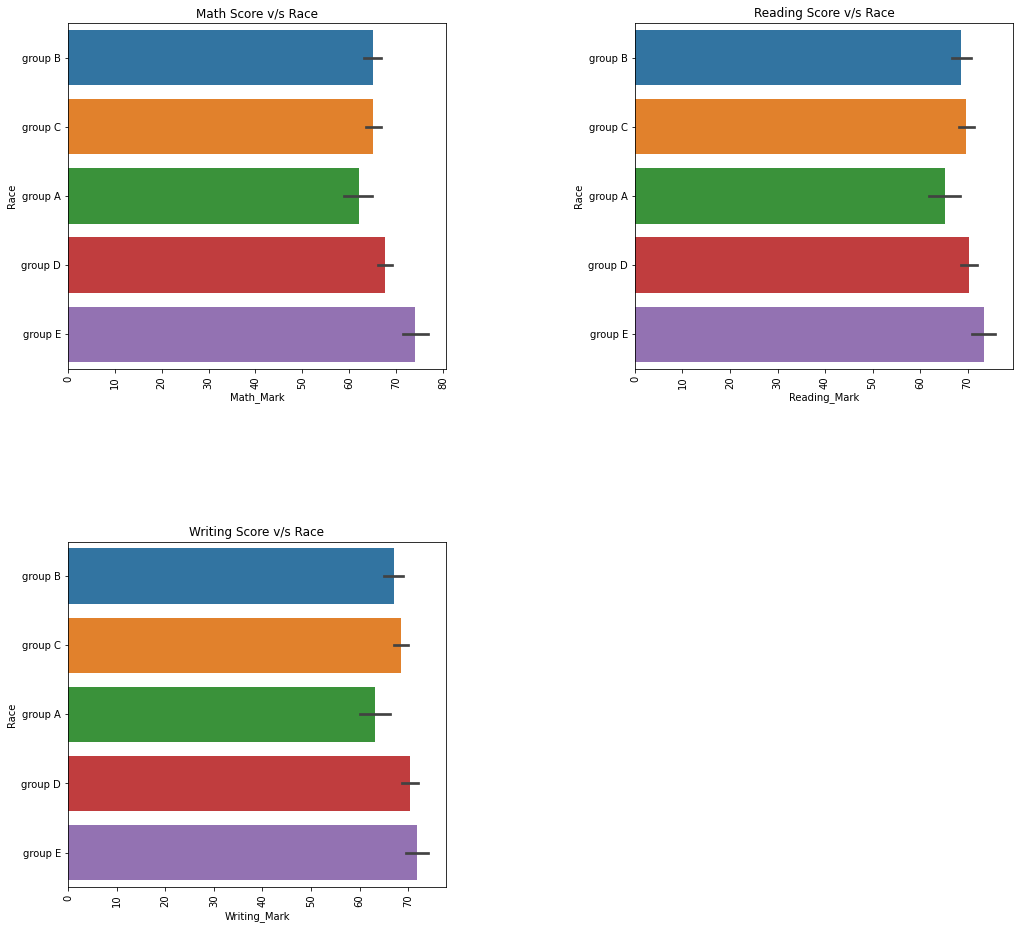

In [158]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(left=0.125, bottom=0.1, right=1,  top=0.9, wspace=0.5,hspace=0.5)
#hspace is space b/w rows, wspace=space b/w columns

plt.subplot(221)
plt.title("Math Score v/s Race")
sns.barplot(y='Race',x='Math_Mark',data=df1)
plt.xticks(rotation=90)

plt.subplot(222)
plt.title("Reading Score v/s Race")
sns.barplot(y='Race',x='Reading_Mark',data=df1)
plt.xticks(rotation='90')

plt.subplot(223)
plt.title("Writing Score v/s Race")
sns.barplot(y='Race',x='Writing_Mark',data=df1)
plt.xticks(rotation='90')

plt.show()

<h3>Observations:</h3>
<ol>
    <li>Students belonging to Group E performed the best</li>
    <li>Students belonging to Group A performed the worst</li>
    <li>Performance of students improve as we move from group A to B to C to D to group E </li>
</ol>

<h3> Showing Math Marks as per the preparation course by using bar graph.<h3>

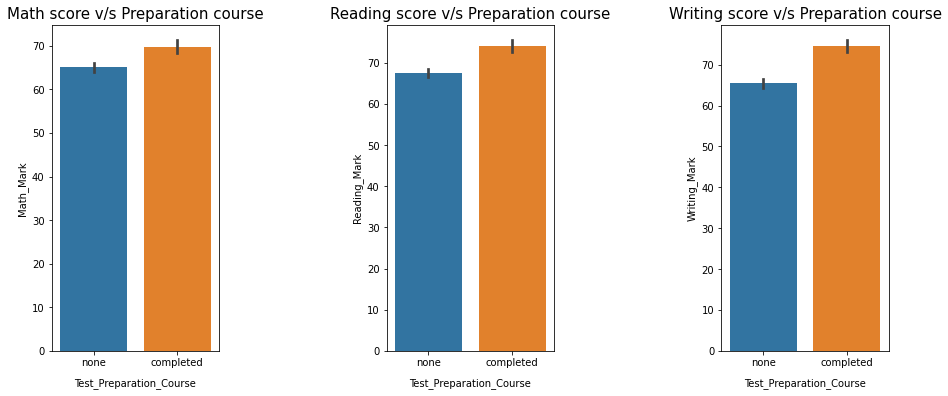

In [159]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(wspace=1)

plt.subplot(1,3,1)
plt.title("Math score v/s Preparation course",fontsize=15)
sns.barplot(x='Test_Preparation_Course',y='Math_Mark',data=df1)

plt.xlabel("Test_Preparation_Course",labelpad=10)
#to increase space between axes and axes label

plt.subplot(1,3,2)
plt.title("Reading score v/s Preparation course",fontsize=15)
sns.barplot(x='Test_Preparation_Course',y='Reading_Mark',data=df1)
plt.xlabel("Test_Preparation_Course",labelpad=10)

plt.subplot(1,3,3)
plt.title("Writing score v/s Preparation course",fontsize=15)
g=sns.barplot(x='Test_Preparation_Course',y='Writing_Mark',data=df1)
plt.xlabel("Test_Preparation_Course",labelpad=10)

plt.show()

<h3>Observations:</h3>
<ol>
    <li>Students who completed test preparartion course scored better in all the three subjects compared with those who didn't complete  the course</li>
    
</ol>

<h3> Depicing how the education status of parents effects the performance of the students with the help of bar graph. <h3>

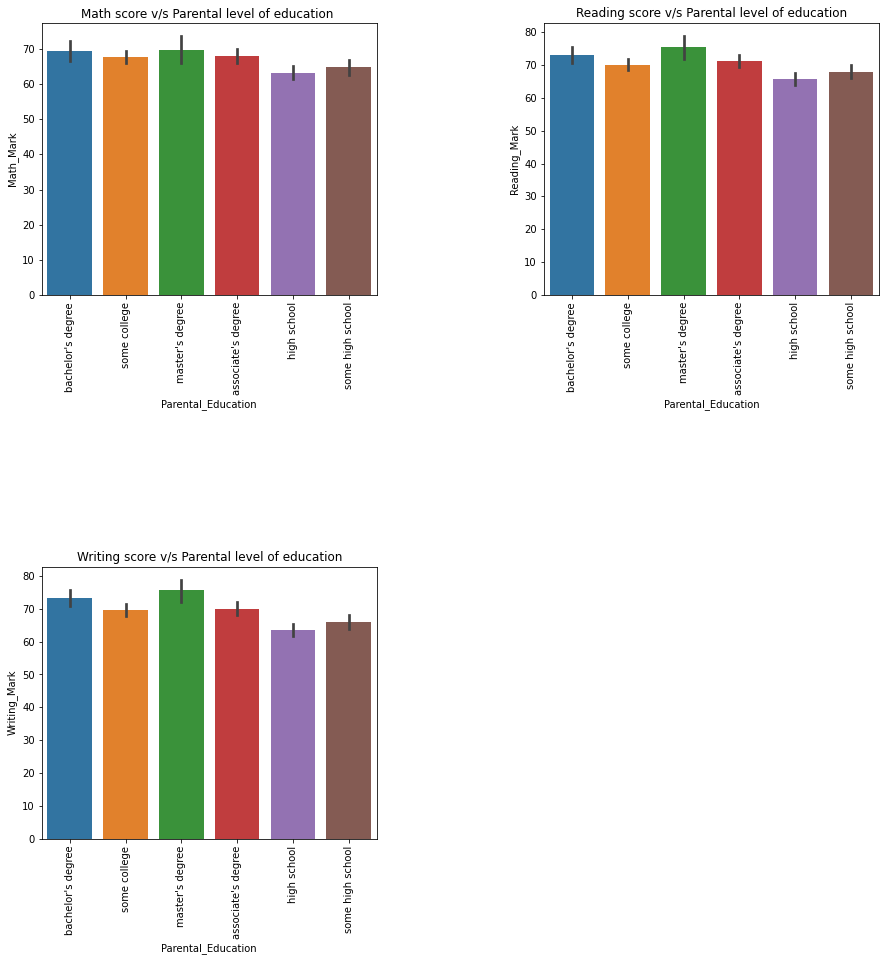

In [160]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=1,wspace=0.5)

plt.subplot(2,2,1)
plt.title("Math score v/s Parental level of education ")
sns.barplot(x='Parental_Education',y="Math_Mark",data=df1)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title("Reading score v/s Parental level of education")
sns.barplot(x='Parental_Education',y="Reading_Mark",data=df1)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.title("Writing score v/s Parental level of education")
sns.barplot(x='Parental_Education',y="Writing_Mark",data=df1)
plt.xticks(rotation=90)

plt.show()

<h3>Observations:</h3>
<ol>
    <li>Students whose parents had master's degree performed the best, this was closely followed by bachelor's degree</li>
    <li>Students whose parental level of education was either high school or some high school performed the worst</li>
    <li>Therefore higher the parent's education better was the student's education</li>
</ol>

<h3> Showing how the standard and free provided meals to the student effects the result performances.<h3>

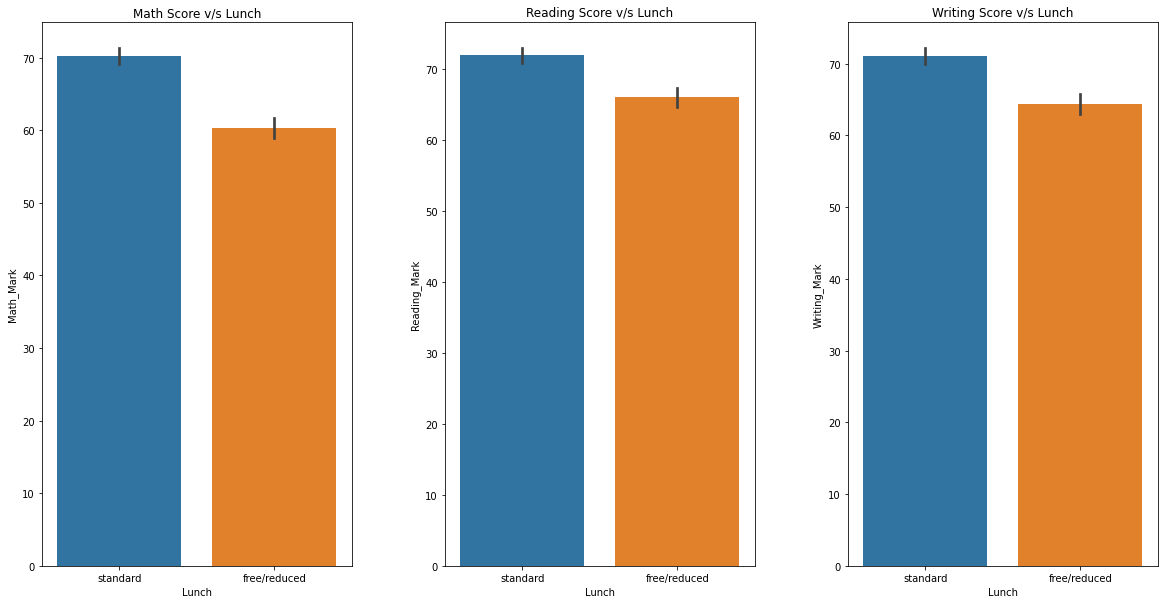

In [161]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1,3,1)
plt.title("Math Score v/s Lunch")
sns.barplot(x='Lunch',y="Math_Mark",data=df1)

plt.subplot(1,3,2)
plt.title("Reading Score v/s Lunch")
sns.barplot(x='Lunch',y="Reading_Mark",data=df1)

plt.subplot(1,3,3)
plt.title("Writing Score v/s Lunch")
sns.barplot(x='Lunch',y="Writing_Mark",data=df1)

plt.show()


<h3>Observations:</h3>
<ol>
    <li>Students who opted for standard lunch performed better than those who optede for free/reduced lunch</li>
</ol>

<h3> Bar Graph showing the result of each subjects performed by various races or ethnicity by refering test preparation course. <h3>

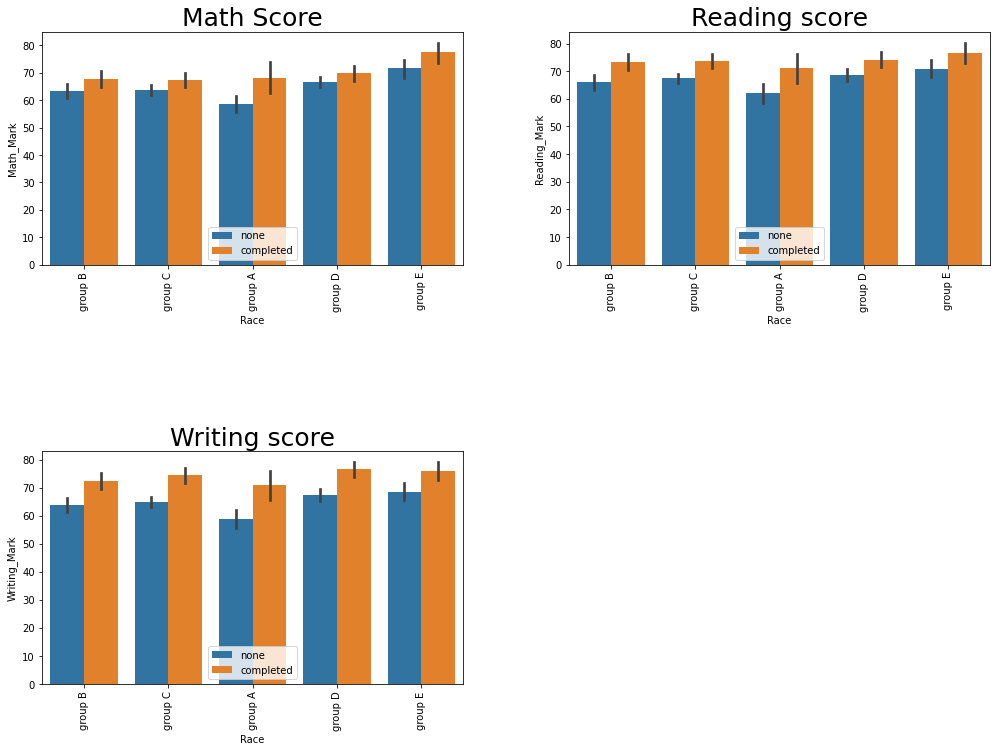

In [162]:
plt.figure(figsize=(17,12))
plt.subplots_adjust(wspace=0.25,hspace=0.8)

plt.subplot(221)
plt.title("Math Score",fontsize=25)
sns.barplot(x='Race',y='Math_Mark',hue='Test_Preparation_Course',data=df1)
plt.xticks(rotation=90)
plt.legend(loc='lower center')

plt.subplot(222)
plt.title("Reading score",fontsize=25)
sns.barplot(x='Race',y='Reading_Mark',hue='Test_Preparation_Course',data=df1)
plt.xticks(rotation=90)
plt.legend(loc='lower center')

plt.subplot(223)
plt.title("Writing score",fontsize=25)
sns.barplot(x='Race',y='Writing_Mark',hue='Test_Preparation_Course',data=df1)
plt.xticks(rotation=90)
plt.legend(loc='lower center')

plt.show()

<h3>Observations:</h3>
<ol>
    <li>Students irrespective of their ethnic group, prformed better if they completed test preparation course </li>
</ol>

<h3> Bar Graph showing the result of students as per their status of parents education.<h3>

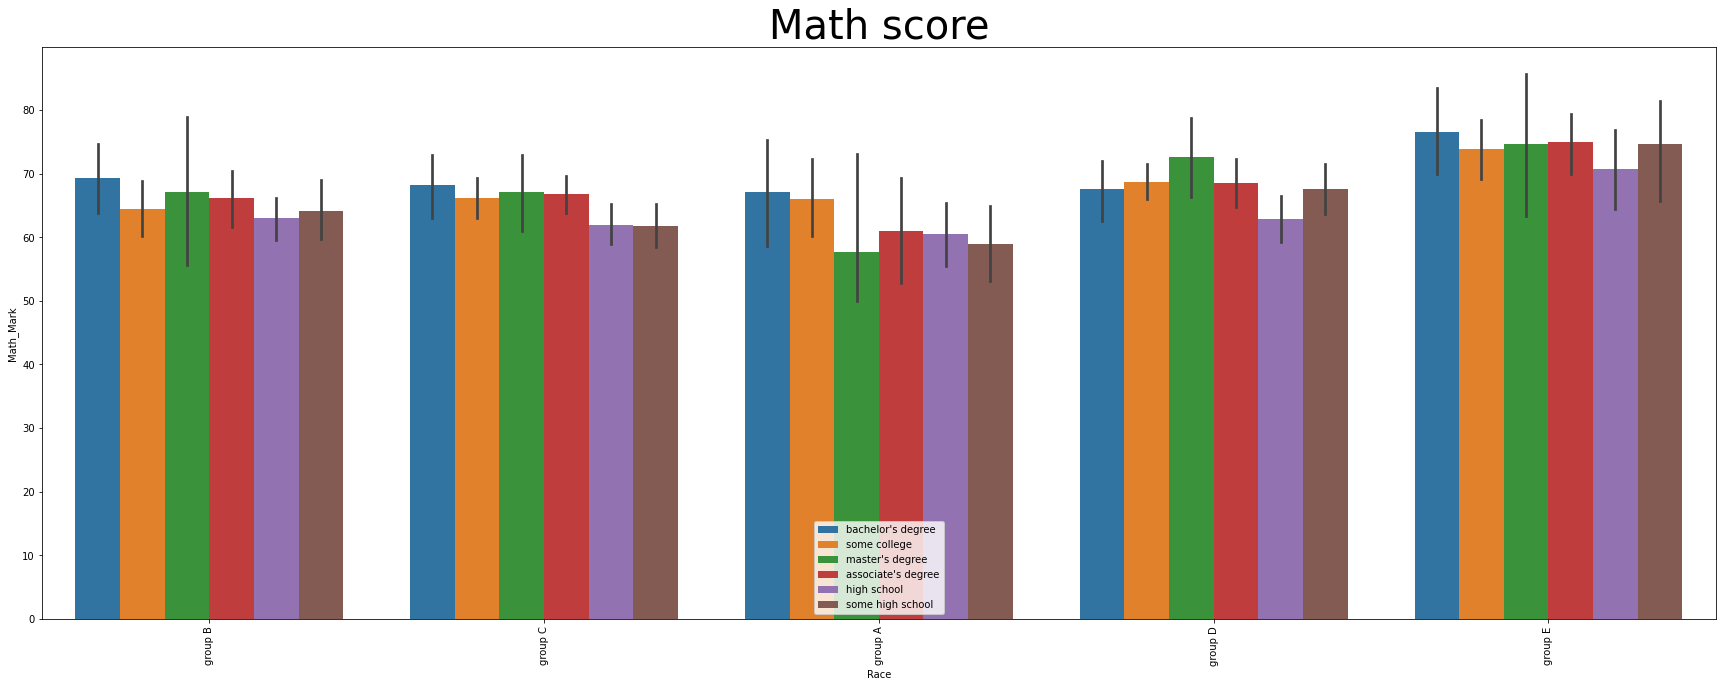

In [163]:
plt.figure(figsize=(30,40))
plt.subplots_adjust(hspace=0.4)

plt.subplot(311)
plt.title("Math score",fontsize=40)
sns.barplot(x='Race',y='Math_Mark',hue='Parental_Education',data=df1)
plt.xticks(rotation=90)
plt.legend(loc='lower center')

plt.show()

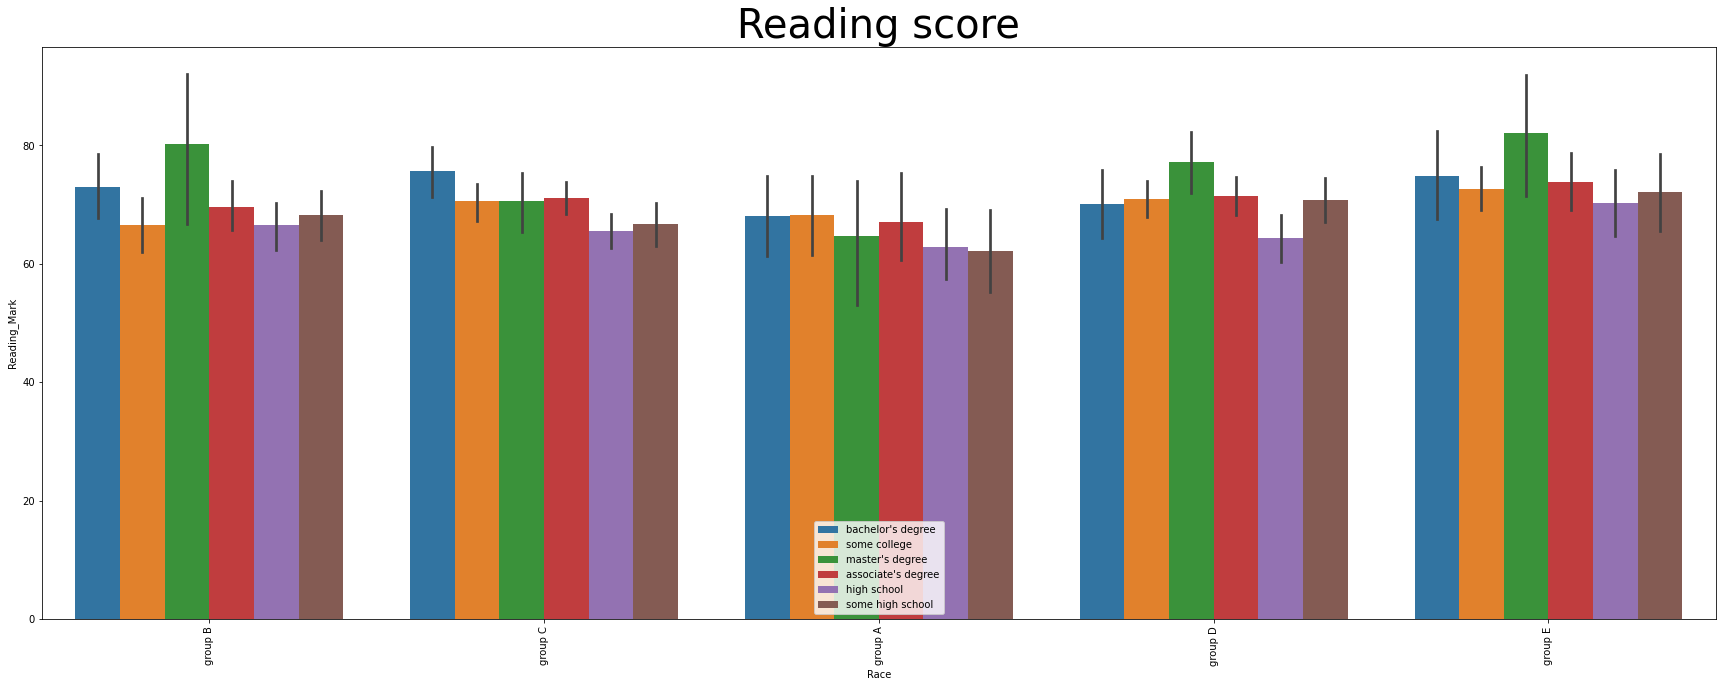

In [165]:
plt.figure(figsize=(30,40))
plt.subplots_adjust(hspace=0.4)

plt.subplot(312)
plt.title("Reading score",fontsize=40)
sns.barplot(x='Race',y='Reading_Mark',hue='Parental_Education',data=df1)
plt.xticks(rotation=90)
plt.legend(loc='lower center')

plt.show()

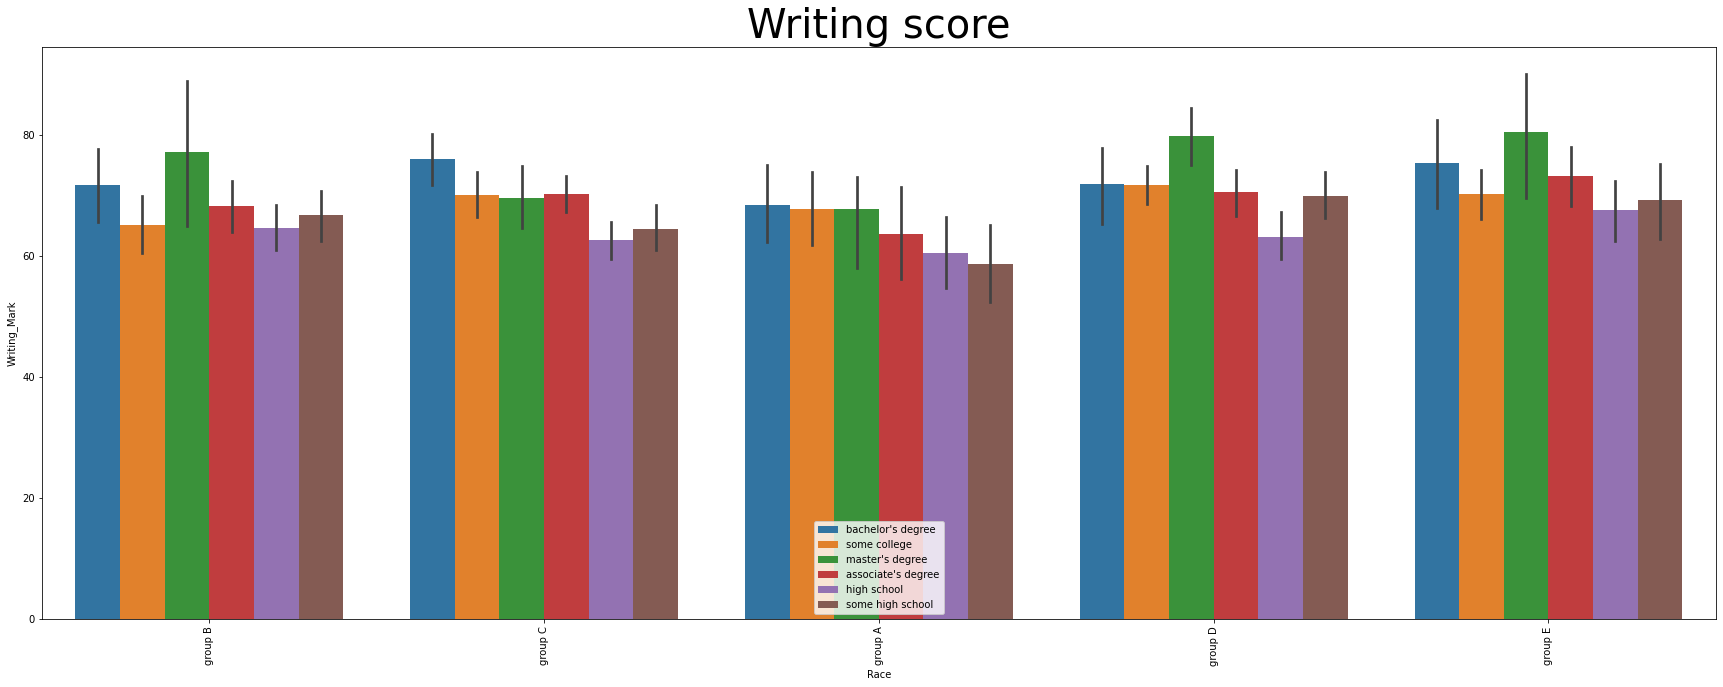

In [166]:
plt.figure(figsize=(30,40))
plt.subplots_adjust(hspace=0.4)

plt.subplot(313)
plt.title("Writing score",fontsize=40)
sns.barplot(x='Race', y='Writing_Mark',hue='Parental_Education',data=df1)
plt.xticks(rotation=90)
plt.legend(loc='lower center')

plt.show()

<h3>Observations:</h3>
<ol>
    <li><b>Math score:</b> Student's whose parents have bachelor's degree and belonging to ethnic group: A,B,C,E and student's whose parents have master's degree and belonging to ethnic group D performed better.</li>
    <li><b>Reading score:</b> Student's whose parents have bachelor's degree and belonging to ethnic group: A,C, and student's whose parents have master's degree and belonging to ethnic group B,D,E performed better.</li>
    <li><b>Writing score:</b> Student's whose parents have bachelor's degree and belonging to ethnic group: A,C and student's whose parents have master's degree and belonging to ethnic group A,B,D,E performed better.</li>
</ol>

<h3> Bar Graph analysing the result of students refering test preparation course as per gender.<h3>

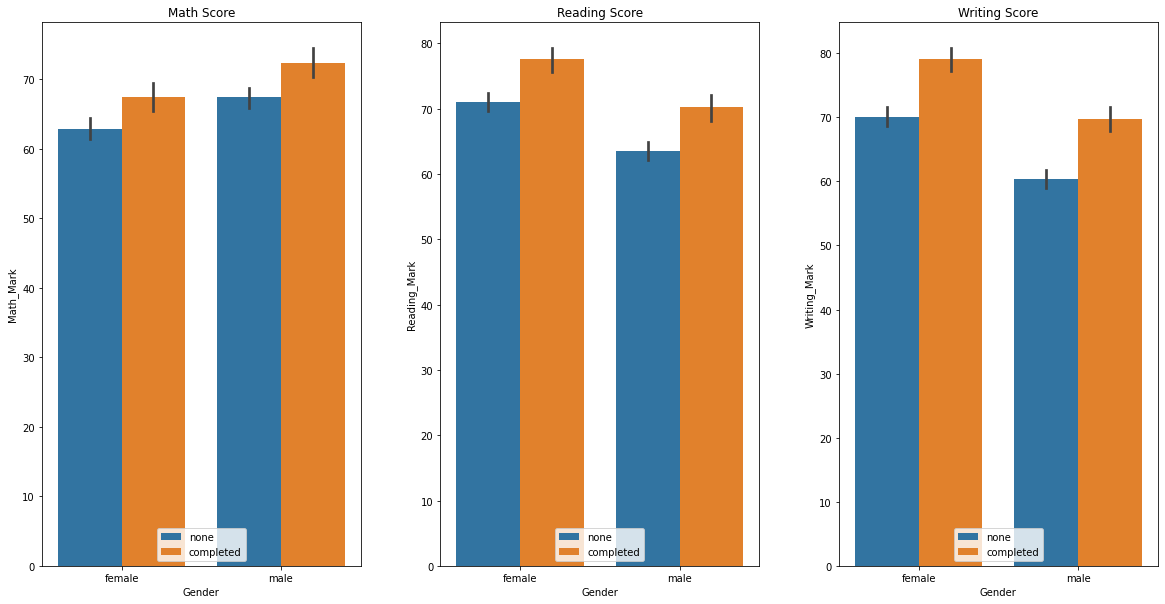

In [167]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.25)

plt.subplot(131)
plt.title("Math Score")
sns.barplot(x="Gender",y="Math_Mark",hue='Test_Preparation_Course',data=df1)
plt.legend(loc='lower center')

plt.subplot(132)
plt.title("Reading Score")
sns.barplot(x="Gender",y="Reading_Mark",hue='Test_Preparation_Course',data=df1)
plt.legend(loc='lower center')

plt.subplot(133)
plt.title("Writing Score")
sns.barplot(x="Gender",y="Writing_Mark",hue='Test_Preparation_Course',data=df1)
plt.legend(loc='lower center')

plt.show()

<h3>Observations:</h3>
<ol>
    <li>Students irrespective of their gender performed better when they completed test course.</li>
</ol>

<h3> Bar Graph analysing the result of different race/ethnicity students in each subject as per gender wise.<h3>

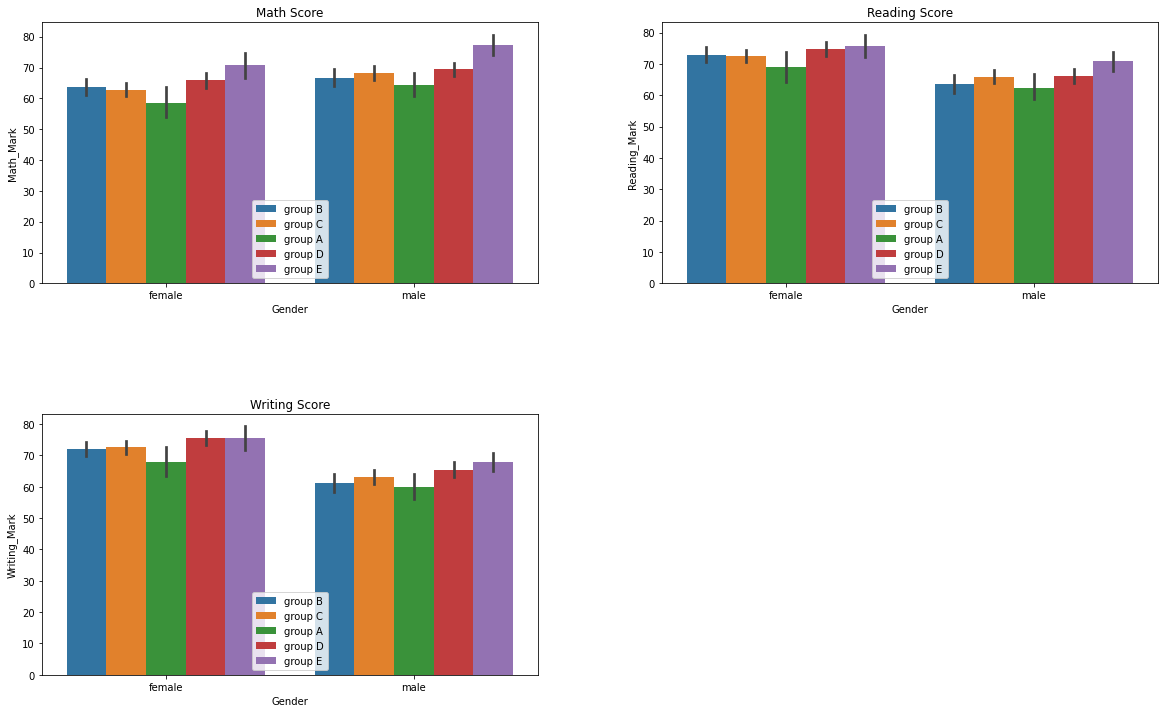

In [168]:
plt.figure(figsize=(20,12))
plt.subplots_adjust(wspace=0.25,hspace=0.5)

plt.subplot(221)
plt.title("Math Score")
sns.barplot(x="Gender",y="Math_Mark",hue='Race',data=df1)
plt.legend(loc='lower center')

plt.subplot(222)
plt.title("Reading Score")
sns.barplot(x="Gender",y="Reading_Mark",hue='Race',data=df1)
plt.legend(loc='lower center')

plt.subplot(223)
plt.title("Writing Score")
sns.barplot(x="Gender",y="Writing_Mark",hue='Race',data=df1)
plt.legend(loc='lower center')

plt.show()

<h3>Observations:</h3>
<ol>
    <li>male and female students from group E performed better in Math</li>
    <li>male and female students from group E and Group D performed better in reading and writing </li>
</ol>

<h3>Bar Graph analysing the result of students in each subjects refering test perparation course as per parental level of education.<h3>

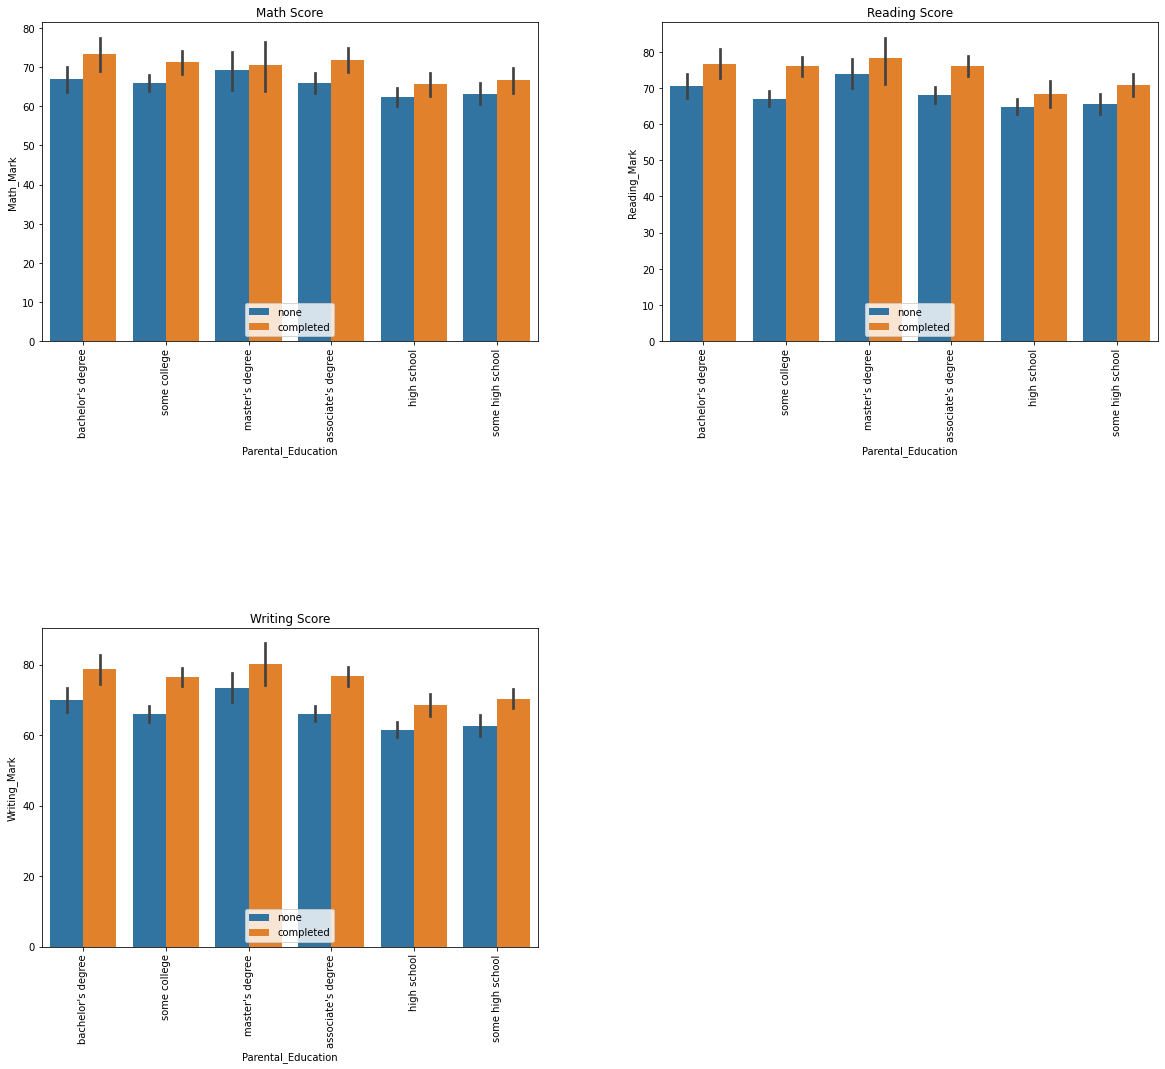

In [169]:
plt.figure(figsize=(20,17))
plt.subplots_adjust(wspace=0.25,hspace=0.9)

plt.subplot(221)
plt.title("Math Score")
sns.barplot(x='Parental_Education',y="Math_Mark",hue='Test_Preparation_Course',data=df1)
plt.xticks(rotation=90)
plt.legend(loc='lower center')

plt.subplot(222)
plt.title("Reading Score")
sns.barplot(x='Parental_Education',y="Reading_Mark",hue='Test_Preparation_Course',data=df1)
plt.xticks(rotation=90)
plt.legend(loc='lower center')

plt.subplot(223)
plt.title("Writing Score")
sns.barplot(x='Parental_Education',y="Writing_Mark",hue='Test_Preparation_Course',data=df1)
plt.xticks(rotation=90)
plt.legend(loc='lower center')

plt.show()

<h3>Observations:</h3>
<ol>
    <li>Students irrespective of their parental level of education, performed better if they completed test preparation course </li>
    <li>The only exception is in Math score of students whose parent's have masters degree whose performance did not depend on completing the test preparation course </li>
</ol>

<h1>Parental Level Of Education</h1>

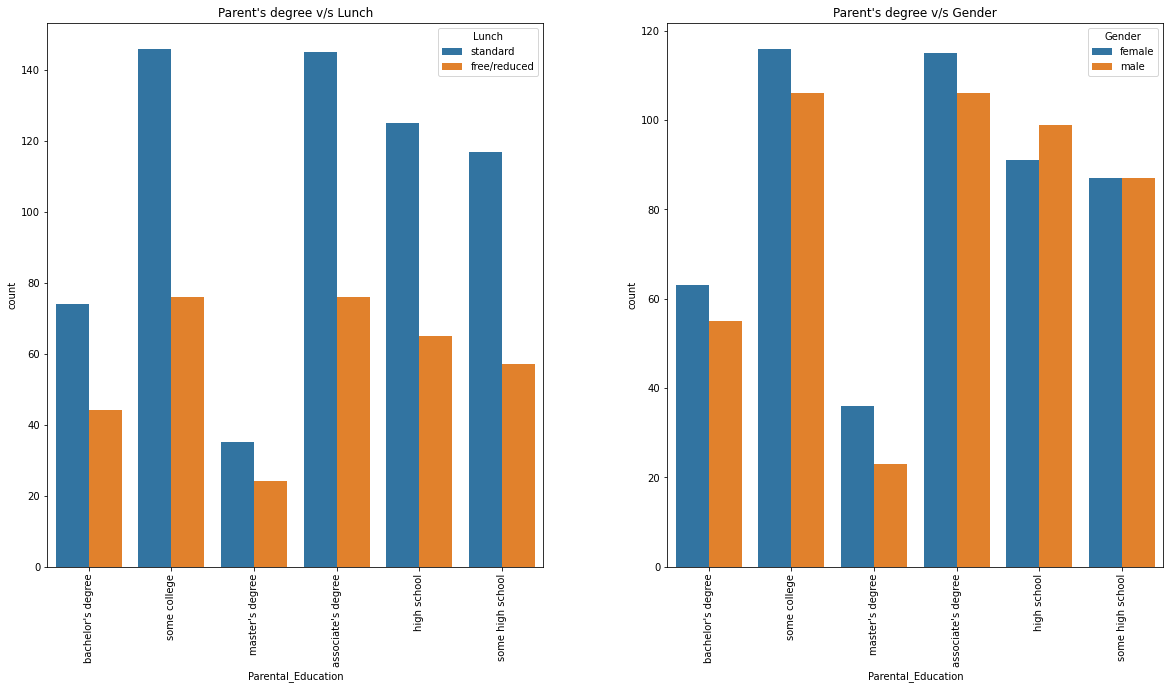

In [170]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.25)

plt.subplot(1,2,1)
plt.title("Parent's degree v/s Lunch")
sns.countplot(x="Parental_Education",hue='Lunch',data=df1)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Parent's degree v/s Gender")
sns.countplot(x="Parental_Education",hue='Gender',data=df1)
plt.xticks(rotation=90)

plt.show()

<h3>Observations:</h3>
<ol>
    <li><b>Lunch:</b> Most of the standard and free lunch students did not complete the course </li>
    <li><b>Gender:</b> Most of the male and female students did not complete the course  </li>
</ol>

<h1>Ethnicity</h1>

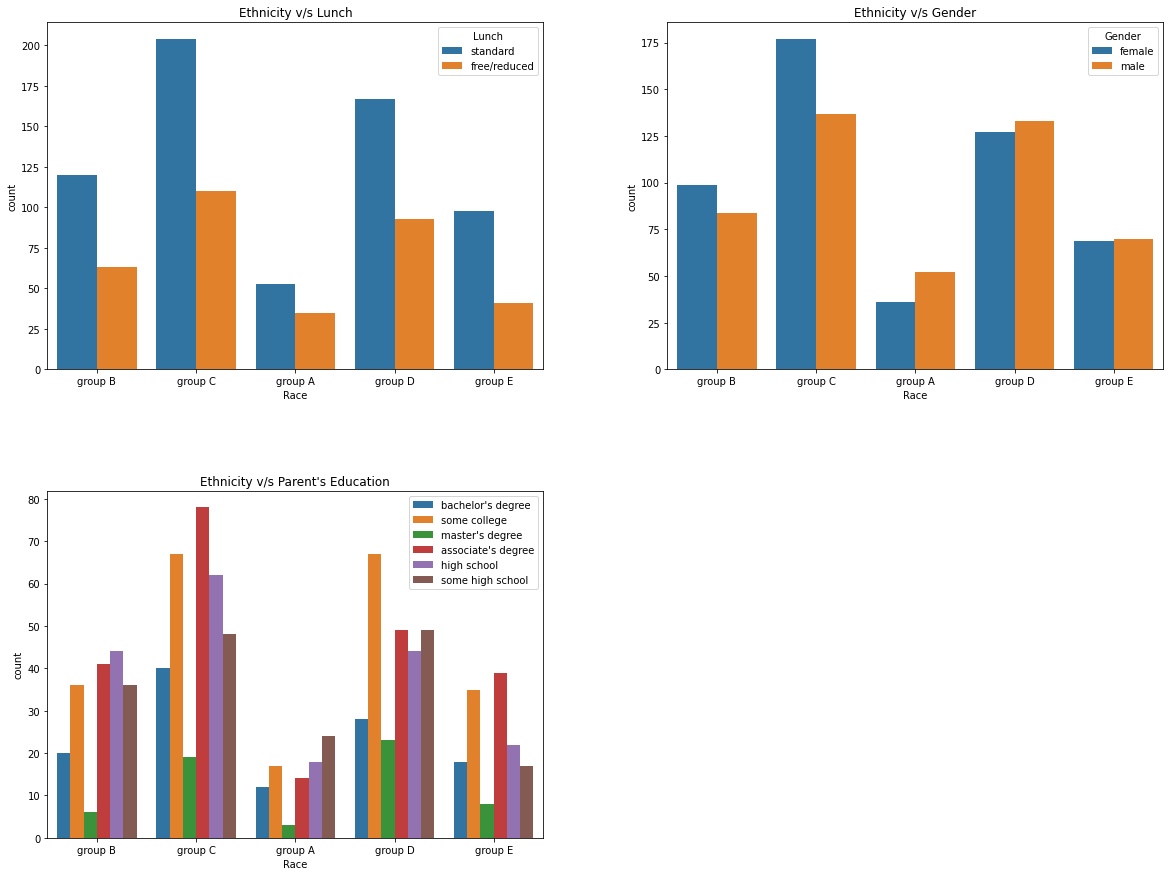

In [171]:
plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=0.35, wspace=0.25)

plt.subplot(221)
plt.title("Ethnicity v/s Lunch")
sns.countplot(x='Race', hue='Lunch',data=df1)

plt.subplot(222)
plt.title("Ethnicity v/s Gender")
sns.countplot(x='Race', hue='Gender',data=df1)

plt.subplot(223)
plt.title("Ethnicity v/s Parent's Education")
sns.countplot(x='Race', hue="Parental_Education",data=df1)
plt.legend(loc="upper right")

plt.show()

<h3>Observations:</h3>
<ol>
    <li><b>Gender:</b> Group C and B have higher number of females, Group A has higher number of males and Group D and E have similar no. of males and females</li>
    <li><b>Lunch:</b> Students of Group B and E have higher percentage of students opting for standard lunch, while students of Group A have lowest percentage</li>
    <li><b>Parental level of education:</b> Group B has higher number of high school graduated parents, Group C has higher number of associate's degree graduated parents, Group A has higher number of some high school graduated parents, Group D has higher number of some college graduated parents, Group E has higher number of associate's graduated parents, </li>
</ol>

<h3>Graph analysing the type of lunch provided to every students gender wise.<h3>

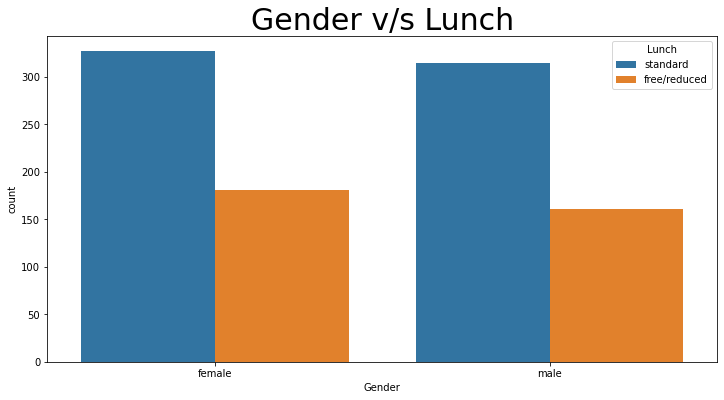

In [172]:
plt.figure(figsize=(12,6))
plt.title("Gender v/s Lunch",fontsize=30)
sns.countplot(x="Gender", hue="Lunch",data=df1)
plt.show()

<h3>Observations:</h3>
<ol>
    <li> Most number of male and female students opted for standard lunch </li>
</ol>

<h1>Correlation analysis</h1>

In [140]:
df.corr()

Math_Mark  Reading_Mark  Writing_Mark
Math_Mark      1.000000      0.817580      0.802642
Reading_Mark   0.817580      1.000000      0.954598
Writing_Mark   0.802642      0.954598      1.000000

<AxesSubplot:>

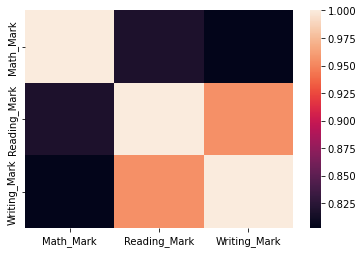

In [141]:
sns.heatmap(df.corr())

In [173]:
dfgroupA = df1.groupby('Race')
dfgroupA = dfgroupA.get_group('group A')

matA = round(dfgroupA.Math_Mark.mean(),1)
readA = round(dfgroupA.Reading_Mark.mean(),1)
writeA = round(dfgroupA.Writing_Mark.mean(),1)

Text(0, 0.5, 'Marks Obtained')

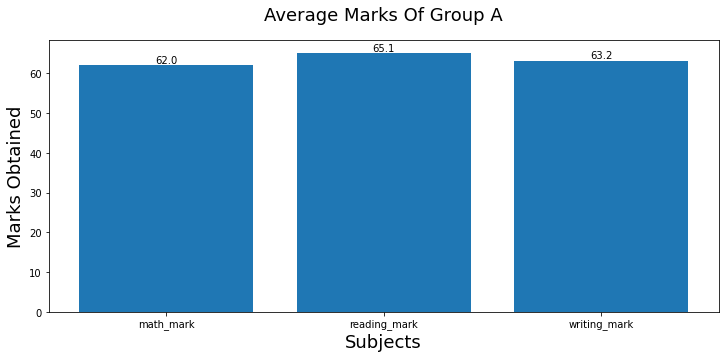

In [174]:
plt.figure(figsize=(12,5), )
plt.subplots_adjust(hspace=0.5, wspace=0.25)
marksA=[matA, readA, writeA]
subjectsA=['math_mark','reading_mark','writing_mark']
plt.bar(subjectsA,marksA)
for i in range(len(subjectsA)):
    plt.text(i,marksA[i],marksA[i],ha='center',va='bottom')

plt.title("Average Marks Of Group A",fontsize=18,y=1.05)
plt.xlabel('Subjects',fontsize=18)
plt.ylabel('Marks Obtained',fontsize=18)

In [175]:
dfgroupB = df1.groupby('Race')
dfgroupB = dfgroupB.get_group('group B')

matB = round(dfgroupB.Math_Mark.mean(),1)
readB = round(dfgroupB.Reading_Mark.mean(),1)
writeB = round(dfgroupB.Writing_Mark.mean(),1)

Text(0, 0.5, 'Marks Obtained')

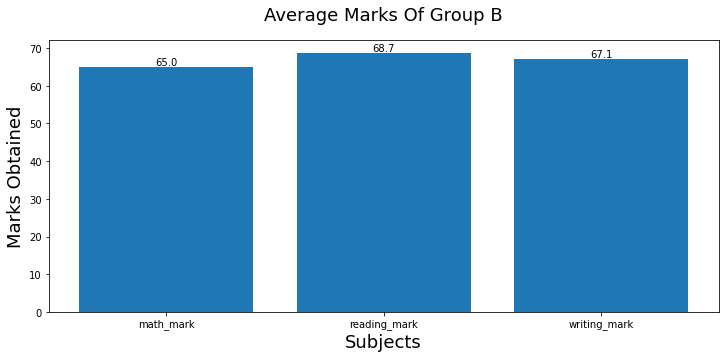

In [176]:
plt.figure(figsize=(12,5), )
plt.subplots_adjust(hspace=0.5, wspace=0.25)
marksB=[matB, readB, writeB]
subjectsB=['math_mark','reading_mark','writing_mark']
plt.bar(subjectsB,marksB)
for i in range(len(subjectsB)):
    plt.text(i,marksB[i],marksB[i],ha='center',va='bottom')

plt.title("Average Marks Of Group B",fontsize=18,y=1.05)
plt.xlabel('Subjects',fontsize=18)
plt.ylabel('Marks Obtained',fontsize=18)

In [177]:
dfgroupC = df1.groupby('Race')
dfgroupC = dfgroupC.get_group('group C')

matC = round(dfgroupC.Math_Mark.mean(),1)
readC = round(dfgroupC.Reading_Mark.mean(),1)
writeC = round(dfgroupC.Writing_Mark.mean(),1)

Text(0, 0.5, 'Marks Obtained')

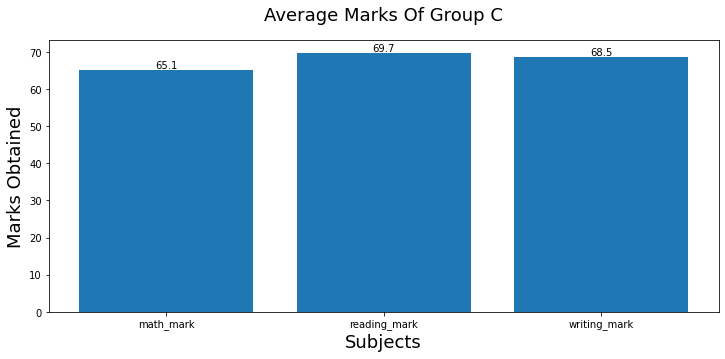

In [178]:
plt.figure(figsize=(12,5), )
plt.subplots_adjust(hspace=0.5, wspace=0.25)
marksC=[matC, readC, writeC]
subjectsC=['math_mark','reading_mark','writing_mark']
plt.bar(subjectsC,marksC)
for i in range(len(subjectsC)):
    plt.text(i,marksC[i],marksC[i],ha='center',va='bottom')

plt.title("Average Marks Of Group C",fontsize=18,y=1.05)
plt.xlabel('Subjects',fontsize=18)
plt.ylabel('Marks Obtained',fontsize=18)

In [179]:
dfgroupD = df1.groupby('Race')
dfgroupD = dfgroupD.get_group('group D')

matD = round(dfgroupD.Math_Mark.mean(),1)
readD = round(dfgroupD.Reading_Mark.mean(),1)
writeD = round(dfgroupD.Writing_Mark.mean(),1)

Text(0, 0.5, 'Marks Obtained')

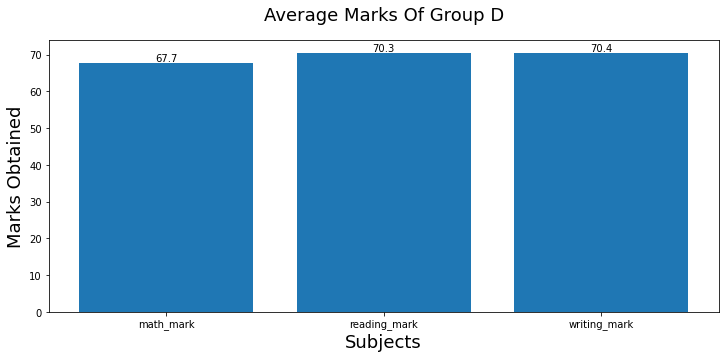

In [180]:
plt.figure(figsize=(12,5), )
plt.subplots_adjust(hspace=0.5, wspace=0.25)
marksD=[matD, readD, writeD]
subjectsD=['math_mark','reading_mark','writing_mark']
plt.bar(subjectsD,marksD)
for i in range(len(subjectsD)):
    plt.text(i,marksD[i],marksD[i],ha='center',va='bottom')

plt.title("Average Marks Of Group D",fontsize=18,y=1.05)
plt.xlabel('Subjects',fontsize=18)
plt.ylabel('Marks Obtained',fontsize=18)

In [181]:
dfgroupE = df1.groupby('Race')
dfgroupE = dfgroupE.get_group('group E')

matE = round(dfgroupE.Math_Mark.mean(),1)
readE = round(dfgroupE.Reading_Mark.mean(),1)
writeE = round(dfgroupE.Writing_Mark.mean(),1)

Text(0, 0.5, 'Marks Obtained')

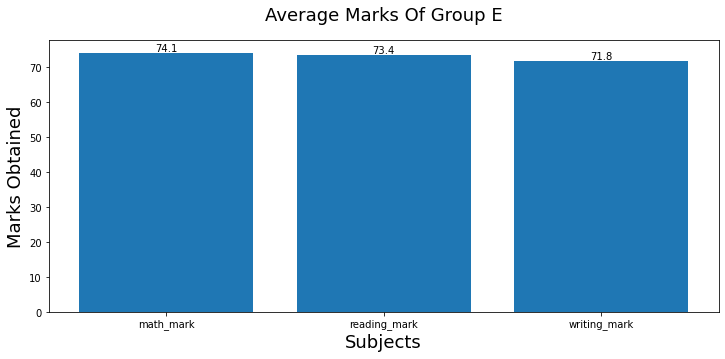

In [182]:
plt.figure(figsize=(12,5), )
plt.subplots_adjust(hspace=0.5, wspace=0.25)
marksE=[matE, readE, writeE]
subjectsE=['math_mark','reading_mark','writing_mark']
plt.bar(subjectsE,marksE)
for i in range(len(subjectsE)):
    plt.text(i,marksE[i],marksE[i],ha='center',va='bottom')

plt.title("Average Marks Of Group E",fontsize=18,y=1.05)
plt.xlabel('Subjects',fontsize=18)
plt.ylabel('Marks Obtained',fontsize=18)

In [ ]:
dfgroupA = df.groupby('Parental_Education')
dfgroupA_bachelor = dfgroupA.get_group("bachelor's degree")
dfgroupA_college = dfgroupA.get_group("some college")
dfgroupA_master = dfgroupA.get_group("master's degree")
dfgroupA_associate = dfgroupA.get_group("associate's degree")
dfgroupA_high = dfgroupA.get_group("high school")
dfgroupA_some = dfgroupA.get_group("some high school")

bachelorA = round(dfgroupA_bachelor.Math_Mark.mean(),1)
CollegeA = round(dfgroupA_college.Math_Mark.mean(),1)
MasterA = round(dfgroupA_master.Math_Mark.mean(),1)
AssociateA = round(dfgroupA_associate.Math_Mark.mean(),1)
highA = round(dfgroupA_high.Math_Mark.mean(),1)
someA = round(dfgroupA_some.Math_Mark.mean(),1)

In [ ]:
plt.figure(figsize=(12,5), )
plt.subplots_adjust(hspace=0.5, wspace=0.25)
parental_groupA = [bachelorA, CollegeA, MasterA, AssociateA, highA, someA]
subject=["Bachelor's Degree","College","Master's Degree", "Associate's Degree", "High School", "Some High School"]
plt.bar(subject,parental_groupA)
for i in range(len(subject)):
    plt.text(i,parental_groupA[i],parental_groupA[i],ha='right',fontsize=0,rotation=30)

plt.title("Average Math Marks Of Students As per Parental Degree",fontsize=18,y=1.05)
plt.xlabel('Subjects',fontsize=18)
plt.ylabel('Marks Obtained',fontsize=18)

In [ ]:
dfgroupB = df.groupby('Parental_Education')
dfgroupB_bachelor = dfgroupB.get_group("bachelor's degree")
dfgroupB_college = dfgroupB.get_group("some college")
dfgroupB_master = dfgroupB.get_group("master's degree")
dfgroupB_associate = dfgroupB.get_group("associate's degree")
dfgroupB_high = dfgroupB.get_group("high school")
dfgroupB_some = dfgroupB.get_group("some high school")

bachelorB = round(dfgroupB_bachelor.Reading_Mark.mean(),1)
CollegeB = round(dfgroupB_college.Reading_Mark.mean(),1)
MasterB = round(dfgroupB_master.Reading_Mark.mean(),1)
AssociateB = round(dfgroupB_associate.Reading_Mark.mean(),1)
highB = round(dfgroupB_high.Reading_Mark.mean(),1)
someB = round(dfgroupB_some.Reading_Mark.mean(),1)

In [ ]:
plt.figure(figsize=(12,5), )
plt.subplots_adjust(hspace=0.5, wspace=0.25)
parental_groupB = [bachelorB, CollegeB, MasterB, AssociateB, highB, someB]
subject=["Bachelor's Degree","College","Master's Degree", "Associate's Degree", "High School", "Some High School"]
plt.bar(subject,parental_groupB)
for i in range(len(subject)):
    plt.text(i,parental_groupB[i],parental_groupB[i],ha='right',fontsize=0,rotation=30)

plt.title("Average Reading Marks Of Students As per Parental Degree",fontsize=18,y=1.05)
plt.xlabel('Subjects',fontsize=18)
plt.ylabel('Marks Obtained',fontsize=18)

In [ ]:
dfgroupC = df.groupby('Parental_Education')
dfgroupC_bachelor = dfgroupC.get_group("bachelor's degree")
dfgroupC_college = dfgroupC.get_group("some college")
dfgroupC_master = dfgroupC.get_group("master's degree")
dfgroupC_associate = dfgroupC.get_group("associate's degree")
dfgroupC_high = dfgroupC.get_group("high school")
dfgroupC_some = dfgroupC.get_group("some high school")

bachelorC = round(dfgroupC_bachelor.Writing_Mark.mean(),1)
CollegeC = round(dfgroupC_college.Writing_Mark.mean(),1)
MasterC = round(dfgroupC_master.Writing_Mark.mean(),1)
AssociateC = round(dfgroupC_associate.Writing_Mark.mean(),1)
highC = round(dfgroupC_high.Writing_Mark.mean(),1)
someC = round(dfgroupC_some.Writing_Mark.mean(),1)

In [ ]:
plt.figure(figsize=(12,5), )
plt.subplots_adjust(hspace=0.5, wspace=0.25)
parental_groupC = [bachelorC, CollegeC, MasterC, AssociateC, highC, someC]
subject=["Bachelor's Degree","College","Master's Degree", "Associate's Degree", "High School", "Some High School"]
plt.bar(subject,parental_groupC)
for i in range(len(subject)):
    plt.text(i,parental_groupC[i],parental_groupC[i],ha='right',fontsize=0,rotation=30)

plt.title("Average Writing Marks Of Students As per Parental Degree",fontsize=18,y=1.05)
plt.xlabel('Subjects',fontsize=18)
plt.ylabel('Marks Obtained',fontsize=18)

In [ ]:
df_math=df.Math_Mark.mean()
testPrep = df.Test_Preparation_Course.unique()
plt.bar(testPrep,df_math)

In [ ]:
##Group A
Test_Course_A_None_M = df[(df['Gender'] == 'male') & (df["Race"] == 'group A') & (df["Test_Preparation_Course"] == "none")]
Total_Test_Course_A_None_M = (Test_Course_A_None_M['Gender'] == 'male').count()
Total_Test_Course_A_None_M

In [ ]:
Test_Course_A_Complete_M = df[(df['Gender'] == 'male') & (df["Race"] == 'group A') & (df["Test_Preparation_Course"] == "completed")]
Total_Test_Course_A_Complete_M = (Test_Course_A_Complete_M['Gender'] == 'male').count()
Total_Test_Course_A_Complete_M

In [ ]:
colors = ['green', 'blue']
pie = go.Figure(data = 
                [go.Pie(labels = ['None', 'Completed'],
                        values = [Total_Test_Course_A_None_M, Total_Test_Course_A_Complete_M],
                        marker = dict(colors = colors),
                        hoverinfo = 'label+value+percent',
                        textinfo = 'label+value',
                        textfont = dict(size = 13),
                        texttemplate = '%{label}: %{value:,f} <br>(%{percent})',
                        textposition = 'auto',
                        hole = .6,
                       )])
pie.show()

In [ ]:
Test_Course_A_None_F = df[(df['Gender'] == 'female') & (df["Race"] == 'group A') & (df["Test_Preparation_Course"] == "none")]
Total_Test_Course_A_None_F = (Test_Course_A_None_F['Gender'] == 'female').count()
Total_Test_Course_A_None_F

In [ ]:
Test_Course_A_Complete_F = df[(df['Gender'] == 'female') & (df["Race"] == 'group A') & (df["Test_Preparation_Course"] == "completed")]
Total_Test_Course_A_Complete_F = (Test_Course_A_Complete_F['Gender'] == 'female').count()
Total_Test_Course_A_Complete_F

In [ ]:
## Group B
Test_Course_B_None_M = df[(df['Gender'] == 'male') & (df["Race"] == 'group B') & (df["Test_Preparation_Course"] == "none")]
Total_Test_Course_B_None_M = (Test_Course_B_None_M['Gender'] == 'male').count()
Total_Test_Course_B_None_M

Test_Course_B_Complete_M = df[(df['Gender'] == 'male') & (df["Race"] == 'group B') & (df["Test_Preparation_Course"] == "completed")]
Total_Test_Course_B_Complete_M = (Test_Course_B_Complete_M['Gender'] == 'male').count()
Total_Test_Course_B_Complete_M

Test_Course_B_None_F = df[(df['Gender'] == 'female') & (df["Race"] == 'group B') & (df["Test_Preparation_Course"] == "none")]
Total_Test_Course_B_None_F = (Test_Course_B_None_F['Gender'] == 'female').count()
Total_Test_Course_B_None_F

Test_Course_B_Complete_F = df[(df['Gender'] == 'female') & (df["Race"] == 'group B') & (df["Test_Preparation_Course"] == "completed")]
Total_Test_Course_B_Complete_F = (Test_Course_B_Complete_F['Gender'] == 'female').count()
Total_Test_Course_B_Complete_F

In [ ]:
## Group C
Test_Course_C_None_M = df[(df['Gender'] == 'male') & (df["Race"] == 'group C') & (df["Test_Preparation_Course"] == "none")]
Total_Test_Course_C_None_M = (Test_Course_C_None_M['Gender'] == 'male').count()
Total_Test_Course_C_None_M

Test_Course_C_Complete_M = df[(df['Gender'] == 'male') & (df["Race"] == 'group C') & (df["Test_Preparation_Course"] == "completed")]
Total_Test_Course_C_Complete_M = (Test_Course_C_Complete_M['Gender'] == 'male').count()
Total_Test_Course_C_Complete_M

Test_Course_C_None_F = df[(df['Gender'] == 'female') & (df["Race"] == 'group C') & (df["Test_Preparation_Course"] == "none")]
Total_Test_Course_C_None_F = (Test_Course_C_None_F['Gender'] == 'female').count()
Total_Test_Course_C_None_F

Test_Course_C_Complete_F = df[(df['Gender'] == 'female') & (df["Race"] == 'group C') & (df["Test_Preparation_Course"] == "completed")]
Total_Test_Course_C_Complete_F = (Test_Course_C_Complete_F['Gender'] == 'female').count()
Total_Test_Course_C_Complete_F

In [ ]:
## Group D
Test_Course_D_None_M = df[(df['Gender'] == 'male') & (df["Race"] == 'group D') & (df["Test_Preparation_Course"] == "none")]
Total_Test_Course_D_None_M = (Test_Course_D_None_M['Gender'] == 'male').count()
Total_Test_Course_D_None_M

Test_Course_D_Complete_M = df[(df['Gender'] == 'male') & (df["Race"] == 'group D') & (df["Test_Preparation_Course"] == "completed")]
Total_Test_Course_D_Complete_M = (Test_Course_D_Complete_M['Gender'] == 'male').count()
Total_Test_Course_D_Complete_M

Test_Course_D_None_F = df[(df['Gender'] == 'female') & (df["Race"] == 'group D') & (df["Test_Preparation_Course"] == "none")]
Total_Test_Course_D_None_F = (Test_Course_D_None_F['Gender'] == 'female').count()
Total_Test_Course_D_None_F

Test_Course_D_Complete_F = df[(df['Gender'] == 'female') & (df["Race"] == 'group D') & (df["Test_Preparation_Course"] == "completed")]
Total_Test_Course_D_Complete_F = (Test_Course_D_Complete_F['Gender'] == 'female').count()
Total_Test_Course_D_Complete_F

In [ ]:
## Group E
Test_Course_E_None_M = df[(df['Gender'] == 'male') & (df["Race"] == 'group E') & (df["Test_Preparation_Course"] == "none")]
Total_Test_Course_E_None_M = (Test_Course_E_None_M['Gender'] == 'male').count()
Total_Test_Course_E_None_M

Test_Course_E_Complete_M = df[(df['Gender'] == 'male') & (df["Race"] == 'group E') & (df["Test_Preparation_Course"] == "completed")]
Total_Test_Course_E_Complete_M = (Test_Course_E_Complete_M['Gender'] == 'male').count()
Total_Test_Course_E_Complete_M

Test_Course_E_None_F = df[(df['Gender'] == 'female') & (df["Race"] == 'group E') & (df["Test_Preparation_Course"] == "none")]
Total_Test_Course_E_None_F = (Test_Course_E_None_F['Gender'] == 'female').count()
Total_Test_Course_E_None_F

Test_Course_E_Complete_F = df[(df['Gender'] == 'female') & (df["Race"] == 'group E') & (df["Test_Preparation_Course"] == "completed")]
Total_Test_Course_E_Complete_F = (Test_Course_E_Complete_F['Gender'] == 'female').count()
Total_Test_Course_E_Complete_F

In [ ]:
## math mark
Test_Math_None = df[(df["Test_Preparation_Course"] == "none")]
Total_Test_None = Test_Math_None.Math_Mark.mean()
Total_Test_None

In [ ]:
Test_Math_completed = df[(df["Test_Preparation_Course"] == "completed")]
Total_Test_completed = Test_Math_completed.Math_Mark.mean()
Total_Test_completed

In [ ]:
colors = ['green', 'blue']
pie = go.Figure(data = 
                [go.Pie(labels = ['None', 'Completed'],
                        values = [Total_Test_None, Total_Test_completed],
                        marker = dict(colors = colors),
                        hoverinfo = 'label+value+percent',
                        textinfo = 'label+value',
                        textfont = dict(size = 13),
                        texttemplate = '%{label}: %{value:,f} <br>(%{percent})',
                        textposition = 'auto',
                        hole = .6,
                       )])
pie.show()

In [ ]:
## Reading Mark
Test_Read_None = df[(df["Test_Preparation_Course"] == "none")]
Total_Read_None = Test_Read_None.Reading_Mark.mean()
Total_Read_None

Test_Read_Completed = df[(df["Test_Preparation_Course"] == "completed")]
Total_Read_Completed = Test_Read_Completed.Reading_Mark.mean()
Total_Read_Completed

## Writing Mark
Test_Write_None = df[(df["Test_Preparation_Course"] == "none")]
Total_Write_None = Test_Write_None.Writing_Mark.mean()
Total_Write_None

Test_Write_Completed = df[(df["Test_Preparation_Course"] == "completed")]
Total_Write_Completed = Test_Write_Completed.Writing_Mark.mean()
Total_Write_Completed

In [ ]:
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output, State
# import plotly.graph_objs as go

# app = dash.Dash(__name__, meta_tags=[{"name": "viewport", "content": "width=device-width"}])

# tabs_styles = {
#     'height': '44px',
#     'align-items': 'center'
# }
# tab_style = {
#     'borderBottom': '1px solid #d6d6d6',
#     'padding': '6px',
#     'fontWeight': 'bold',
#     'border-radius': '15px',
#     'background-color': '#F2F2F2',
#     'box-shadow': '4px 4px 4px 4px lightgrey',

# }

# tab_selected_style = {
#     'borderTop': '1px solid #d6d6d6',
#     'borderBottom': '1px solid #d6d6d6',
#     'backgroundColor': '#119DFF',
#     'color': 'white',
#     'padding': '6px',
#     'border-radius': '15px',
# }

# app.layout = html.Div((

#     html.Div([
#         html.Div([
#             html.Div([
#                 html.H3('Student Performance Analysis', style = {'margin-bottom': '0px', 'color': 'black'}),
#             ])
#         ], className = "create_container1 four columns", id = "title"),

#     ], id = "header", className = "row flex-display", style = {"margin-bottom": "25px"}),

#     html.Div([
#         html.Div([
#             dcc.Tabs(id = "tabs-styled-with-inline", value = 'tab-1', children = [
#                 dcc.Tab(label = 'Tab 1', value = 'tab-1', style = tab_style, selected_style = tab_selected_style),
#                 dcc.Tab(label = 'Tab 2', value = 'tab-2', style = tab_style, selected_style = tab_selected_style),
#                 dcc.Tab(label = 'Tab 3', value = 'tab-3', style = tab_style, selected_style = tab_selected_style),
#                 dcc.Tab(label = 'Tab 4', value = 'tab-4', style = tab_style, selected_style = tab_selected_style),
#             ], style = tabs_styles),
#             html.Div(id = 'tabs-content-inline')
#         ], className = "create_container3 ten columns", ),
#     ], className = "row flex-display"),

# ), id= "mainContainer", style={"display": "flex", "flex-direction": "column"})

# @app.callback(Output('tabs-content-inline', 'children'),
#               Input('tabs-styled-with-inline', 'value'))
# def render_content(tab):
#     if tab == 'tab-1':
#         return html.Div([
#             html.Div([
#                 html.Div([
#                     html.P('Select Group', className = 'fix_label', style = {'color': 'black', 'margin-top': '2px'}),
#                     dcc.Dropdown(id = 'select_group',
#                                  multi = False,
#                                  clearable = True,
#                                  disabled = False,
#                                  style = {'display': True},
#                                  value = 'group A',
#                                  placeholder = 'Select Group',
#                                  options = [{'label': 'Group A', 'value': 'group A'},
#                                             {'label': 'Group B','value': 'group B'},
#                                             {'label': 'Group C','value': 'group C'},
#                                             {'label': 'Group D','value': 'group D'},
#                                             {'label': 'Group E','value': 'group E'}], className = 'dcc_compon'),

#                 ], className = "create_container2 six columns", style = {'margin-top': '20px'}),
#             ], className = "row flex-display"),
            
#             html.Div([
#                 html.Div([
#                     dcc.Graph(id = 'group_chart',
#                               config = {'displayModeBar': 'hover'}),
#                 ], className = "create_container2 ten columns", style = {'margin-top': '10px'}),
#             ], className = "row flex-display"),
#         ])
    
#     elif tab == 'tab-2':
#         return html.Div([
#             html.Div([
#                 html.Div([
#                     html.P('Select Group', className = 'fix_label', style = {'color': 'black', 'margin-top': '2px'}),
#                     dcc.Dropdown(id = 'select_race',
#                                  multi = False,
#                                  clearable = False,
#                                  disabled = False,
#                                  style = {'display': True},
#                                  value = 'group A',
#                                  placeholder = 'Select Year',
#                                  options = [{'label': 'Group A', 'value': 'group A'},
#                                             {'label': 'Group B', 'value': 'group B'},
#                                             {'label': 'Group C', 'value': 'group C'},
#                                             {'label': 'Group D', 'value': 'group D'},
#                                             {'label': 'Group E', 'value': 'group E'}], className = 'dcc_compon'),

#                 ], className = "create_container2 six columns", style = {'margin-top': '20px'}),
#             ], className = "row flex-display"),

#             html.Div([
#                 html.Div([
#                     html.P('Select Gender Type', className = 'fix_label', style = {'color': 'black'}),
#                     dcc.RadioItems(id = 'gender_item',
#                                    labelStyle = {"display": "inline-block"},
#                                    options = [
#                                        {'label': 'Male', 'value': 'Male'},
#                                        {'label': 'Female', 'value': 'Female'}],
#                                    value = 'Male',
#                                    style = {'text-align': 'center', 'color': 'black'}, className = 'dcc_compon'),

#                     dcc.Graph(id = 'gender_chart',
#                               config = {'displayModeBar': 'hover'}),

#                 ], className = "create_container2 ten columns", style = {'margin-top': '10px'}),

#             ], className = "row flex-display"),
#         ])

#     elif tab == 'tab-3':
#          return html.Div([
#             html.Div([
#                 html.Div([
#                     html.P('Select Group', className = 'fix_label', style = {'color': 'black', 'margin-top': '2px'}),
#                     dcc.Dropdown(id = 'select_group',
#                                  multi = False,
#                                  clearable = True,
#                                  disabled = False,
#                                  style = {'display': True},
#                                  value = 'Math_Mark',
#                                  placeholder = 'Select Subject',
#                                  options = [{'label': 'Math Mark', 'value': 'Math_Mark'},
#                                             {'label': 'Reading Mark','value': 'Reading_Mark'},
#                                             {'label': 'Writing Mark','value': 'Writing_Mark'}], className = 'dcc_compon'),

#                 ], className = "create_container2 six columns", style = {'margin-top': '20px'}),
#             ], className = "row flex-display"),
            
#             html.Div([
#                 html.Div([
#                     dcc.Graph(id = 'parent_chart',
#                               config = {'displayModeBar': 'hover'}),
#                 ], className = "create_container2 ten columns", style = {'margin-top': '10px'}),
#             ], className = "row flex-display"),
#         ])
        
        
#     elif tab == 'tab-4':
#         return html.Div([
#             html.Div([
#                 html.Div([
#                     html.P('Select Year', className = 'fix_label', style = {'color': 'black', 'margin-top': '2px'}),
#                     dcc.Dropdown(id = 'select_year',
#                                  multi = False,
#                                  clearable = True,
#                                  disabled = False,
#                                  style = {'display': True},
#                                  value = 'Math_Mark',
#                                  placeholder = 'Select Subject',
#                                  options = [{'label': 'Math', 'value': 'Math_Mark'},
#                                             {'label': 'Reading','value': 'Reading_Mark'},
#                                             {'label': 'Writing','value': 'Writing_Mark'}], className = 'dcc_compon'),

#                 ], className = "create_container2 six columns", style = {'margin-top': '20px'}),
#             ], className = "row flex-display"),
            
#             html.Div([
#                 html.Div([
#                     dcc.Graph(id = 'average_chart',
#                               config = {'displayModeBar': 'hover'}),
#                 ], className = "create_container2 ten columns", style = {'margin-top': '10px'}),
#             ], className = "row flex-display"),
#         ])
    
    
        
        
    
# @app.callback(
# Output('group_chart', 'figure'), 
# [Input('select_group', 'value')]
# )
# #graph plot and styling
# def update_graph(value):
#     if value == 'group A':
#         return {'data':[go.Bar(
#                                 x = subjectsA,
#                                 y = marksA
#                                 ),
                             
#                         ] ,
#                 'layout': go.Layout(
#                             plot_bgcolor = '#F2F2F2',
#                             paper_bgcolor = '#F2F2F2',
#                             title = {
#                                     'text': 'Subject wise Marks of ' + (value),
#                                     'y': 0.9,
#                                     'x': 0.5,
#                                     'xanchor': 'center',
#                                     'yanchor': 'top'},
#                             titlefont = {
#                                      'color': 'black',
#                                      'size': 18},
#                             hovermode = 'closest',
#                             margin = dict(l = 300),
                        
#                             xaxis=dict(
#                                 #type='line',
#                                 title='<b>Subject</b>',
#                                 showgrid=True,
#                                 showline=True,
#                                 showticklabels = True,
#                                 linecolor = 'black',
#                                 linewidth = 1,
#                                 ticks = 'outside',
#                                 tickfont = dict(
#                                     family = 'Arial',
#                                     size = 13,
#                                     color = 'black'
#                                 )
#                             ),
#                             yaxis=dict(
#                                 title= '<b>Marks</b>',
#                                 # autorange = 'reversed',
#                                 color = 'black',
#                                 showgrid=True,
#                                 showline=True,
#                                 showticklabels = True,
#                                 linecolor = 'black',
#                                 linewidth = 1,
#                                 ticks = 'outside',
#                                 tickfont = dict(
#                                     family = 'Arial',
#                                     size = 13,
#                                     color = 'black'
#                                 )
#                             ),                         
#                         )    
#                }
#     if value == 'group B':
#         return {'data':[go.Bar(
#                                 x = subjectsB,
#                                 y = marksB
#                                 ),
                             
#                         ] ,
#                 'layout': go.Layout(
#                             plot_bgcolor = '#F2F2F2',
#                             paper_bgcolor = '#F2F2F2',
#                             title = {
#                                     'text': 'Subject wise Marks of ' + (value),
#                                     'y': 0.9,
#                                     'x': 0.5,
#                                     'xanchor': 'center',
#                                     'yanchor': 'top'},
#                             titlefont = {
#                                      'color': 'black',
#                                      'size': 18},
#                             hovermode = 'closest',
#                             margin = dict(l = 300),
                        
#                             xaxis=dict(
#                                 #type='line',
#                                 title='<b>Subject</b>',
#                                 showgrid=True,
#                                 showline=True,
#                                 showticklabels = True,
#                                 linecolor = 'black',
#                                 linewidth = 1,
#                                 ticks = 'outside',
#                                 tickfont = dict(
#                                     family = 'Arial',
#                                     size = 13,
#                                     color = 'black'
#                                 )
#                             ),
#                             yaxis=dict(
#                                 title= '<b>Marks</b>',
#                                 # autorange = 'reversed',
#                                 color = 'black',
#                                 showgrid=True,
#                                 showline=True,
#                                 showticklabels = True,
#                                 linecolor = 'black',
#                                 linewidth = 1,
#                                 ticks = 'outside',
#                                 tickfont = dict(
#                                     family = 'Arial',
#                                     size = 13,
#                                     color = 'black'
#                                 )
#                             ),                         
#                         )    
#                }
#     if value == 'group C':
#         return {'data':[go.Bar(
#                                 x = subjectsC,
#                                 y = marksC
#                                 ),
                             
#                         ] ,
#                 'layout': go.Layout(
#                             plot_bgcolor = '#F2F2F2',
#                             paper_bgcolor = '#F2F2F2',
#                             title = {
#                                     'text': 'Subject wise Marks of ' + (value),
#                                     'y': 0.9,
#                                     'x': 0.5,
#                                     'xanchor': 'center',
#                                     'yanchor': 'top'},
#                             titlefont = {
#                                      'color': 'black',
#                                      'size': 18},
#                             hovermode = 'closest',
#                             margin = dict(l = 300),
                        
#                             xaxis=dict(
#                                 #type='line',
#                                 title='<b>Subject</b>',
#                                 showgrid=True,
#                                 showline=True,
#                                 showticklabels = True,
#                                 linecolor = 'black',
#                                 linewidth = 1,
#                                 ticks = 'outside',
#                                 tickfont = dict(
#                                     family = 'Arial',
#                                     size = 13,
#                                     color = 'black'
#                                 )
#                             ),
#                             yaxis=dict(
#                                 title= '<b>Marks</b>',
#                                 # autorange = 'reversed',
#                                 color = 'black',
#                                 showgrid=True,
#                                 showline=True,
#                                 showticklabels = True,
#                                 linecolor = 'black',
#                                 linewidth = 1,
#                                 ticks = 'outside',
#                                 tickfont = dict(
#                                     family = 'Arial',
#                                     size = 13,
#                                     color = 'black'
#                                 )
#                             ),                         
#                         )    
#                }
#     if value == 'group D':
#         return {'data':[go.Bar(
#                                 x = subjectsD,
#                                 y = marksD
#                                 ),
                             
#                         ] ,
#                 'layout': go.Layout(
#                             plot_bgcolor = '#F2F2F2',
#                             paper_bgcolor = '#F2F2F2',
#                             title = {
#                                     'text': 'Subject wise Marks of ' + (value),
#                                     'y': 0.9,
#                                     'x': 0.5,
#                                     'xanchor': 'center',
#                                     'yanchor': 'top'},
#                             titlefont = {
#                                      'color': 'black',
#                                      'size': 18},
#                             hovermode = 'closest',
#                             margin = dict(l = 300),
                        
#                             xaxis=dict(
#                                 #type='line',
#                                 title='<b>Subject</b>',
#                                 showgrid=True,
#                                 showline=True,
#                                 showticklabels = True,
#                                 linecolor = 'black',
#                                 linewidth = 1,
#                                 ticks = 'outside',
#                                 tickfont = dict(
#                                     family = 'Arial',
#                                     size = 13,
#                                     color = 'black'
#                                 )
#                             ),
#                             yaxis=dict(
#                                 title= '<b>Marks</b>',
#                                 # autorange = 'reversed',
#                                 color = 'black',
#                                 showgrid=True,
#                                 showline=True,
#                                 showticklabels = True,
#                                 linecolor = 'black',
#                                 linewidth = 1,
#                                 ticks = 'outside',
#                                 tickfont = dict(
#                                     family = 'Arial',
#                                     size = 13,
#                                     color = 'black'
#                                 )
#                             ),                         
#                         )    
#                }
#     if value == 'group E':
#         return {'data':[go.Bar(
#                                 x = subjectsE,
#                                 y = marksE
#                                 ),
                             
#                         ] ,
#                 'layout': go.Layout(
#                             plot_bgcolor = '#F2F2F2',
#                             paper_bgcolor = '#F2F2F2',
#                             title = {
#                                     'text': 'Subject wise Marks of ' + (value),
#                                     'y': 0.9,
#                                     'x': 0.5,
#                                     'xanchor': 'center',
#                                     'yanchor': 'top'},
#                             titlefont = {
#                                      'color': 'black',
#                                      'size': 18},
#                             hovermode = 'closest',
#                             margin = dict(l = 300),
                        
#                             xaxis=dict(
#                                 #type='line',
#                                 title='<b>Subject</b>',
#                                 showgrid=True,
#                                 showline=True,
#                                 showticklabels = True,
#                                 linecolor = 'black',
#                                 linewidth = 1,
#                                 ticks = 'outside',
#                                 tickfont = dict(
#                                     family = 'Arial',
#                                     size = 13,
#                                     color = 'black'
#                                 )
#                             ),
#                             yaxis=dict(
#                                 title= '<b>Marks</b>',
#                                 # autorange = 'reversed',
#                                 color = 'black',
#                                 showgrid=True,
#                                 showline=True,
#                                 showticklabels = True,
#                                 linecolor = 'black',
#                                 linewidth = 1,
#                                 ticks = 'outside',
#                                 tickfont = dict(
#                                     family = 'Arial',
#                                     size = 13,
#                                     color = 'black'
#                                 )
#                             ),                         
#                         )    
#                }
    
# @app.callback(Output('gender_chart', 'figure'),
#               [Input('select_race', 'value')],
#               [Input('gender_item', 'value')]
#              )
# def update_graph(select_race, gender_item):
#     if select_race == 'group A':
#         if gender_item == 'Male':
#             color = ['green', 'orange']
#             return {'data':[go.Pie(labels = ['Not Completed', 'Completed'],
#                                    values = [Total_Test_Course_A_None_M, Total_Test_Course_A_Complete_M],
#                                    marker = dict(colors = color),
#                                    hoverinfo = 'label+value+percent',
#                                    textinfo = 'label+value',
#                                    textfont = dict(size = 13),
#                                    texttemplate = '%{label}: %{value:} <br>(%{percent})',
#                                    textposition = 'auto',
#                                    hole = .6,
#                                   )] ,
#                     'layout': go.Layout(
#                         plot_bgcolor = '#F2F2F2',
#                         paper_bgcolor = '#F2F2F2',
#                         hovermode = 'x',
#                         title = {
#                             'text': 'Test Preparation Course Of ' + (select_race),
#                             'y': 0.955,
#                             'x': 0.5,
#                             'xanchor': 'center',
#                             'yanchor': 'top'},
#                         titlefont = {
#                             'color': 'black',
#                             'size': 15},
#                         legend = {
#                             'orientation': 'h',
#                             'bgcolor': '#F2F2F2',
#                             'xanchor': 'center', 'x': 0.5, 'y': -0.07},
#                         font = dict(
#                             family = "sans-serif",
#                             size = 12,
#                             color = 'black')
#                     ),
#             }
#         if gender_item == 'Female':
#             color = ['green', 'orange']
#             return {'data':[go.Pie(labels = ['Not Completed', 'Completed'],
#                                    values = [Total_Test_Course_A_None_F, Total_Test_Course_A_Complete_F],
#                                    marker = dict(colors = color),
#                                    hoverinfo = 'label+value+percent',
#                                    textinfo = 'label+value',
#                                    textfont = dict(size = 13),
#                                    texttemplate = '%{label}: %{value:} <br>(%{percent})',
#                                    textposition = 'auto',
#                                    hole = .6,
#                                   )] ,
#                     'layout': go.Layout(
#                         plot_bgcolor = '#F2F2F2',
#                         paper_bgcolor = '#F2F2F2',
#                         hovermode = 'x',
#                         title = {
#                             'text': 'Test Preparation Course Of ' + (select_race),
#                             'y': 0.955,
#                             'x': 0.5,
#                             'xanchor': 'center',
#                             'yanchor': 'top'},
#                         titlefont = {
#                             'color': 'black',
#                             'size': 15},
#                         legend = {
#                             'orientation': 'h',
#                             'bgcolor': '#F2F2F2',
#                             'xanchor': 'center', 'x': 0.5, 'y': -0.07},
#                         font = dict(
#                             family = "sans-serif",
#                             size = 12,
#                             color = 'black')
#                     ),
#             }
        
#     if select_race == 'group B':
#         if gender_item == 'Male':
#             color = ['green', 'orange']
#             return {'data':[go.Pie(labels = ['Completed', 'Not Completed'],
#                                    values = [Total_Test_Course_B_None_M, Total_Test_Course_B_Complete_M],
#                                    marker = dict(colors = color),
#                                    hoverinfo = 'label+value+percent',
#                                    textinfo = 'label+value',
#                                    textfont = dict(size = 13),
#                                    texttemplate = '%{label}: %{value:} <br>(%{percent})',
#                                    textposition = 'auto',
#                                    hole = .6,
#                                   )] ,
#                     'layout': go.Layout(
#                         plot_bgcolor = '#F2F2F2',
#                         paper_bgcolor = '#F2F2F2',
#                         hovermode = 'x',
#                         title = {
#                             'text': 'Test Preparation Course Of ' + (select_race),
#                             'y': 0.955,
#                             'x': 0.5,
#                             'xanchor': 'center',
#                             'yanchor': 'top'},
#                         titlefont = {
#                             'color': 'black',
#                             'size': 15},
#                         legend = {
#                             'orientation': 'h',
#                             'bgcolor': '#F2F2F2',
#                             'xanchor': 'center', 'x': 0.5, 'y': -0.07},
#                         font = dict(
#                             family = "sans-serif",
#                             size = 12,
#                             color = 'black')
#                     ),
#             }
#         if gender_item == 'Female':
#             color = ['green', 'orange']
#             return {'data':[go.Pie(labels = ['Not Completed', 'Completed'],
#                                    values = [Total_Test_Course_B_None_F, Total_Test_Course_B_Complete_F],
#                                    marker = dict(colors = color),
#                                    hoverinfo = 'label+value+percent',
#                                    textinfo = 'label+value',
#                                    textfont = dict(size = 13),
#                                    texttemplate = '%{label}: %{value:} <br>(%{percent})',
#                                    textposition = 'auto',
#                                    hole = .6,
#                                   )] ,
#                     'layout': go.Layout(
#                         plot_bgcolor = '#F2F2F2',
#                         paper_bgcolor = '#F2F2F2',
#                         hovermode = 'x',
#                         title = {
#                             'text': 'Test Preparation Course Of ' + (select_race),
#                             'y': 0.955,
#                             'x': 0.5,
#                             'xanchor': 'center',
#                             'yanchor': 'top'},
#                         titlefont = {
#                             'color': 'black',
#                             'size': 15},
#                         legend = {
#                             'orientation': 'h',
#                             'bgcolor': '#F2F2F2',
#                             'xanchor': 'center', 'x': 0.5, 'y': -0.07},
#                         font = dict(
#                             family = "sans-serif",
#                             size = 12,
#                             color = 'black')
#                     ),
#             }
        
#     if select_race == 'group C':
#         if gender_item == 'Male':
#             color = ['green', 'orange']
#             return {'data':[go.Pie(labels = ['Not Completed', 'Completed'],
#                                    values = [Total_Test_Course_C_None_M, Total_Test_Course_C_Complete_M],
#                                    marker = dict(colors = color),
#                                    hoverinfo = 'label+value+percent',
#                                    textinfo = 'label+value',
#                                    textfont = dict(size = 13),
#                                    texttemplate = '%{label}: %{value:} <br>(%{percent})',
#                                    textposition = 'auto',
#                                    hole = .6,
#                                   )] ,
#                     'layout': go.Layout(
#                         plot_bgcolor = '#F2F2F2',
#                         paper_bgcolor = '#F2F2F2',
#                         hovermode = 'x',
#                         title = {
#                             'text': 'Test Preparation Course Of ' + (select_race),
#                             'y': 0.955,
#                             'x': 0.5,
#                             'xanchor': 'center',
#                             'yanchor': 'top'},
#                         titlefont = {
#                             'color': 'black',
#                             'size': 15},
#                         legend = {
#                             'orientation': 'h',
#                             'bgcolor': '#F2F2F2',
#                             'xanchor': 'center', 'x': 0.5, 'y': -0.07},
#                         font = dict(
#                             family = "sans-serif",
#                             size = 12,
#                             color = 'black')
#                     ),
#             }
#         if gender_item == 'Female':
#             color = ['green', 'orange']
#             return {'data':[go.Pie(labels = ['Not Completed', 'Completed'],
#                                    values = [Total_Test_Course_C_None_F, Total_Test_Course_C_Complete_F],
#                                    marker = dict(colors = color),
#                                    hoverinfo = 'label+value+percent',
#                                    textinfo = 'label+value',
#                                    textfont = dict(size = 13),
#                                    texttemplate = '%{label}: %{value:} <br>(%{percent})',
#                                    textposition = 'auto',
#                                    hole = .6,
#                                   )] ,
#                     'layout': go.Layout(
#                         plot_bgcolor = '#F2F2F2',
#                         paper_bgcolor = '#F2F2F2',
#                         hovermode = 'x',
#                         title = {
#                             'text': 'Test Preparation Course Of ' + (select_race),
#                             'y': 0.955,
#                             'x': 0.5,
#                             'xanchor': 'center',
#                             'yanchor': 'top'},
#                         titlefont = {
#                             'color': 'black',
#                             'size': 15},
#                         legend = {
#                             'orientation': 'h',
#                             'bgcolor': '#F2F2F2',
#                             'xanchor': 'center', 'x': 0.5, 'y': -0.07},
#                         font = dict(
#                             family = "sans-serif",
#                             size = 12,
#                             color = 'black')
#                     ),
#             }
        
#     if select_race == 'group D':
#         if gender_item == 'Male':
#             color = ['green', 'orange']
#             return {'data':[go.Pie(labels = ['Not Completed', 'Completed'],
#                                    values = [Total_Test_Course_D_None_M, Total_Test_Course_D_Complete_M],
#                                    marker = dict(colors = color),
#                                    hoverinfo = 'label+value+percent',
#                                    textinfo = 'label+value',
#                                    textfont = dict(size = 13),
#                                    texttemplate = '%{label}: %{value:} <br>(%{percent})',
#                                    textposition = 'auto',
#                                    hole = .6,
#                                   )] ,
#                     'layout': go.Layout(
#                         plot_bgcolor = '#F2F2F2',
#                         paper_bgcolor = '#F2F2F2',
#                         hovermode = 'x',
#                         title = {
#                             'text': 'Test Preparation Course Of ' + (select_race),
#                             'y': 0.955,
#                             'x': 0.5,
#                             'xanchor': 'center',
#                             'yanchor': 'top'},
#                         titlefont = {
#                             'color': 'black',
#                             'size': 15},
#                         legend = {
#                             'orientation': 'h',
#                             'bgcolor': '#F2F2F2',
#                             'xanchor': 'center', 'x': 0.5, 'y': -0.07},
#                         font = dict(
#                             family = "sans-serif",
#                             size = 12,
#                             color = 'black')
#                     ),
#             }
#         if gender_item == 'Female':
#             color = ['green', 'orange']
#             return {'data':[go.Pie(labels = ['Not Completed', 'Completed'],
#                                    values = [Total_Test_Course_D_None_F, Total_Test_Course_D_Complete_F],
#                                    marker = dict(colors = color),
#                                    hoverinfo = 'label+value+percent',
#                                    textinfo = 'label+value',
#                                    textfont = dict(size = 13),
#                                    texttemplate = '%{label}: %{value:} <br>(%{percent})',
#                                    textposition = 'auto',
#                                    hole = .6,
#                                   )] ,
#                     'layout': go.Layout(
#                         plot_bgcolor = '#F2F2F2',
#                         paper_bgcolor = '#F2F2F2',
#                         hovermode = 'x',
#                         title = {
#                             'text': 'Test Preparation Course Of ' + (select_race),
#                             'y': 0.955,
#                             'x': 0.5,
#                             'xanchor': 'center',
#                             'yanchor': 'top'},
#                         titlefont = {
#                             'color': 'black',
#                             'size': 15},
#                         legend = {
#                             'orientation': 'h',
#                             'bgcolor': '#F2F2F2',
#                             'xanchor': 'center', 'x': 0.5, 'y': -0.07},
#                         font = dict(
#                             family = "sans-serif",
#                             size = 12,
#                             color = 'black')
#                     ),
#             } 
        
#     if select_race == 'group E':
#         if gender_item == 'Male':
#             color = ['green', 'orange']
#             return {'data':[go.Pie(labels = ['Not Completed', 'Completed'],
#                                    values = [Total_Test_Course_E_None_M, Total_Test_Course_E_Complete_M],
#                                    marker = dict(colors = color),
#                                    hoverinfo = 'label+value+percent',
#                                    textinfo = 'label+value',
#                                    textfont = dict(size = 13),
#                                    texttemplate = '%{label}: %{value:} <br>(%{percent})',
#                                    textposition = 'auto',
#                                    hole = .6,
#                                   )] ,
#                     'layout': go.Layout(
#                         plot_bgcolor = '#F2F2F2',
#                         paper_bgcolor = '#F2F2F2',
#                         hovermode = 'x',
#                         title = {
#                             'text': 'Test Preparation Course Of ' + (select_race),
#                             'y': 0.955,
#                             'x': 0.5,
#                             'xanchor': 'center',
#                             'yanchor': 'top'},
#                         titlefont = {
#                             'color': 'black',
#                             'size': 15},
#                         legend = {
#                             'orientation': 'h',
#                             'bgcolor': '#F2F2F2',
#                             'xanchor': 'center', 'x': 0.5, 'y': -0.07},
#                         font = dict(
#                             family = "sans-serif",
#                             size = 12,
#                             color = 'black')
#                     ),
#             }
#         if gender_item == 'Female':
#             color = ['green', 'orange']
#             return {'data':[go.Pie(labels = ['Not Completed', 'Completed'],
#                                    values = [Total_Test_Course_E_None_F, Total_Test_Course_E_Complete_F],
#                                    marker = dict(colors = color),
#                                    hoverinfo = 'label+value+percent',
#                                    textinfo = 'label+value',
#                                    textfont = dict(size = 13),
#                                    texttemplate = '%{label}: %{value:} <br>(%{percent})',
#                                    textposition = 'auto',
#                                    hole = .6,
#                                   )] ,
#                     'layout': go.Layout(
#                         plot_bgcolor = '#F2F2F2',
#                         paper_bgcolor = '#F2F2F2',
#                         hovermode = 'x',
#                         title = {
#                             'text': 'Test Preparation Course Of ' + (select_race),
#                             'y': 0.955,
#                             'x': 0.5,
#                             'xanchor': 'center',
#                             'yanchor': 'top'},
#                         titlefont = {
#                             'color': 'black',
#                             'size': 15},
#                         legend = {
#                             'orientation': 'h',
#                             'bgcolor': '#F2F2F2',
#                             'xanchor': 'center', 'x': 0.5, 'y': -0.07},
#                         font = dict(
#                             family = "sans-serif",
#                             size = 12,
#                             color = 'black')
#                     ),
#             }
# @app.callback(
# Output('parent_chart', 'figure'), 
# [Input('select_group', 'value')]
# )
# #graph plot and styling
# def update_graph(value):
#     if value == 'Math_Mark':
#         return {'data':[go.Bar(
#                                 x = subject,
#                                 y = parental_groupA
#                                 ),
                             
#                         ] ,
#                 'layout': go.Layout(
#                             plot_bgcolor = '#F2F2F2',
#                             paper_bgcolor = '#F2F2F2',
#                             title = {
#                                     'text': 'Average Math Mark As Per Parental Education',
#                                     'y': 0.9,
#                                     'x': 0.5,
#                                     'xanchor': 'center',
#                                     'yanchor': 'top'},
#                             titlefont = {
#                                      'color': 'black',
#                                      'size': 18},
#                             hovermode = 'closest',
#                             margin = dict(l = 300),
                        
#                             xaxis=dict(
#                                 #type='line',
#                                 title='<b>Parental Education</b>',
#                                 showgrid=True,
#                                 showline=True,
#                                 showticklabels = True,
#                                 linecolor = 'black',
#                                 linewidth = 1,
#                                 ticks = 'outside',
#                                 tickfont = dict(
#                                     family = 'Arial',
#                                     size = 13,
#                                     color = 'black'
#                                 )
#                             ),
#                             yaxis=dict(
#                                 title= '<b>Marks</b>',
#                                 # autorange = 'reversed',
#                                 color = 'black',
#                                 showgrid=True,
#                                 showline=True,
#                                 showticklabels = True,
#                                 linecolor = 'black',
#                                 linewidth = 1,
#                                 ticks = 'outside',
#                                 tickfont = dict(
#                                     family = 'Arial',
#                                     size = 13,
#                                     color = 'black'
#                                 )
#                             ),                         
#                         )    
#                }    
    
#     if value == 'Reading_Mark':
#         return {'data':[go.Bar(
#                                 x = subject,
#                                 y = parental_groupB
#                                 ),
                             
#                         ] ,
#                 'layout': go.Layout(
#                             plot_bgcolor = '#F2F2F2',
#                             paper_bgcolor = '#F2F2F2',
#                             title = {
#                                     'text': 'Average Reading Mark As Per Parental Education',
#                                     'y': 0.9,
#                                     'x': 0.5,
#                                     'xanchor': 'center',
#                                     'yanchor': 'top'},
#                             titlefont = {
#                                      'color': 'black',
#                                      'size': 18},
#                             hovermode = 'closest',
#                             margin = dict(l = 300),
                        
#                             xaxis=dict(
#                                 #type='line',
#                                 title='<b>Parental Education</b>',
#                                 showgrid=True,
#                                 showline=True,
#                                 showticklabels = True,
#                                 linecolor = 'black',
#                                 linewidth = 1,
#                                 ticks = 'outside',
#                                 tickfont = dict(
#                                     family = 'Arial',
#                                     size = 13,
#                                     color = 'black'
#                                 )
#                             ),
#                             yaxis=dict(
#                                 title= '<b>Marks</b>',
#                                 # autorange = 'reversed',
#                                 color = 'black',
#                                 showgrid=True,
#                                 showline=True,
#                                 showticklabels = True,
#                                 linecolor = 'black',
#                                 linewidth = 1,
#                                 ticks = 'outside',
#                                 tickfont = dict(
#                                     family = 'Arial',
#                                     size = 13,
#                                     color = 'black'
#                                 )
#                             ),                         
#                         )    
#                }    
    
#     if value == 'Writing_Mark':
#         return {'data':[go.Bar(
#                                 x = subject,
#                                 y = parental_groupC
#                                 ),
                             
#                         ] ,
#                 'layout': go.Layout(
#                             plot_bgcolor = '#F2F2F2',
#                             paper_bgcolor = '#F2F2F2',
#                             title = {
#                                     'text': 'Average Writing Mark As Per Parental Education',
#                                     'y': 0.9,
#                                     'x': 0.5,
#                                     'xanchor': 'center',
#                                     'yanchor': 'top'},
#                             titlefont = {
#                                      'color': 'black',
#                                      'size': 18},
#                             hovermode = 'closest',
#                             margin = dict(l = 300),
                        
#                             xaxis=dict(
#                                 #type='line',
#                                 title='<b>Parental Education</b>',
#                                 showgrid=True,
#                                 showline=True,
#                                 showticklabels = True,
#                                 linecolor = 'black',
#                                 linewidth = 1,
#                                 ticks = 'outside',
#                                 tickfont = dict(
#                                     family = 'Arial',
#                                     size = 13,
#                                     color = 'black'
#                                 )
#                             ),
#                             yaxis=dict(
#                                 title= '<b>Marks</b>',
#                                 # autorange = 'reversed',
#                                 color = 'black',
#                                 showgrid=True,
#                                 showline=True,
#                                 showticklabels = True,
#                                 linecolor = 'black',
#                                 linewidth = 1,
#                                 ticks = 'outside',
#                                 tickfont = dict(
#                                     family = 'Arial',
#                                     size = 13,
#                                     color = 'black'
#                                 )
#                             ),                         
#                         )    
#                }  
    
# @app.callback(
# Output('average_chart', 'figure'), 
# [Input('select_year', 'value')]
# )
# #graph plot and styling
# def update_graph(value):
#     if value == 'Math_Mark':
#         return {'data':[go.Pie(labels = ['Not Completed', 'Completed'],
#                                values = [Total_Test_None, Total_Test_completed],
#                                marker = dict(colors = colors),
#                                hoverinfo = 'label+value+percent',
#                                textinfo = 'label+value',
#                                textfont = dict(size = 11),
#                                texttemplate = '%{label}: %{value} <br>(%{percent})',
#                                textposition = 'auto',
#                                hole = .7,
#                                rotation = 100
#                               ),
#                        ] ,
#                 'layout': go.Layout(
#                             plot_bgcolor = '#F2F2F2',
#                             paper_bgcolor = '#F2F2F2',
#                             hovermode = 'x',
#                             title = {
#                                 'text': 'Average Math Mark As Per Test Preparation Course ',
#                                 'y': 0.9,
#                                 'x': 0.5,
#                                 'xanchor': 'center',
#                                 'yanchor': 'top'},
#                             titlefont = {
#                                 'color': 'black',
#                                 'size': 15},
#                             legend = {
#                                 'orientation': 'h',
#                                 'bgcolor': '#F2F2F2',
#                                 'xanchor': 'center', 'x': 0.5, 'y': -0.14},
#                             font = dict(
#                                 family = "sans-serif",
#                                 size = 12,
#                                 color = 'black')
#                         ),                           
#                }
#     if value == 'Reading_Mark':
#         return {'data':[go.Pie(labels = ['Not Completed', 'Completed'],
#                                values = [Total_Read_None, Total_Read_Completed],
#                                marker = dict(colors = colors),
#                                hoverinfo = 'label+value+percent',
#                                textinfo = 'label+value',
#                                textfont = dict(size = 11),
#                                texttemplate = '%{label}: %{value} <br>(%{percent})',
#                                textposition = 'auto',
#                                hole = .7,
#                                rotation = 100
#                               ),
#                        ] ,
#                 'layout': go.Layout(
#                             plot_bgcolor = '#F2F2F2',
#                             paper_bgcolor = '#F2F2F2',
#                             hovermode = 'x',
#                             title = {
#                                 'text': 'Average Reading Mark As Per Test Preparation Course ',
#                                 'y': 0.9,
#                                 'x': 0.5,
#                                 'xanchor': 'center',
#                                 'yanchor': 'top'},
#                             titlefont = {
#                                 'color': 'black',
#                                 'size': 15},
#                             legend = {
#                                 'orientation': 'h',
#                                 'bgcolor': '#F2F2F2',
#                                 'xanchor': 'center', 'x': 0.5, 'y': -0.14},
#                             font = dict(
#                                 family = "sans-serif",
#                                 size = 12,
#                                 color = 'black')
#                         ),                           
#                }
    
#     if value == 'Writing_Mark':
#         return {'data':[go.Pie(labels = ['Not Completed', 'Completed'],
#                                values = [Total_Write_None, Total_Write_Completed],
#                                marker = dict(colors = colors),
#                                hoverinfo = 'label+value+percent',
#                                textinfo = 'label+value',
#                                textfont = dict(size = 11),
#                                texttemplate = '%{label}: %{value} <br>(%{percent})',
#                                textposition = 'auto',
#                                hole = .7,
#                                rotation = 100
#                               ),
#                        ] ,
#                 'layout': go.Layout(
#                             plot_bgcolor = '#F2F2F2',
#                             paper_bgcolor = '#F2F2F2',
#                             hovermode = 'x',
#                             title = {
#                                 'text': 'Average Writing Mark As Per Write Preparation Course ',
#                                 'y': 0.9,
#                                 'x': 0.5,
#                                 'xanchor': 'center',
#                                 'yanchor': 'top'},
#                             titlefont = {
#                                 'color': 'black',
#                                 'size': 15},
#                             legend = {
#                                 'orientation': 'h',
#                                 'bgcolor': '#F2F2F2',
#                                 'xanchor': 'center', 'x': 0.5, 'y': -0.14},
#                             font = dict(
#                                 family = "sans-serif",
#                                 size = 12,
#                                 color = 'black')
#                         ),                           
#                }
# if __name__ == '__main__':
#     app.run_server()

<h3>Observations:</h3>
<ol>
    <li> Students who performed well in reading test, performed well even in writing test </li>
    <li> Ethnicity and lunch parameters affect math score more than writing and reading scores. </li>
</ol>